In [33]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 500 

## task 1

In [81]:
x = np.linspace(0, 2*np.pi, 257)
# delete last data point
x = x[:-1]
x = x.T

In [35]:
y = np.cos(x) + 0.2  # here adding 0.2 shifts y up by 0.2
z = np.fft.fft(y) / len(y) * 2

In [84]:
y = np.cos(x) + 0.2  # here adding 0.2 shifts y up by 0.2
z = np.fft.fft(y) / len(y)

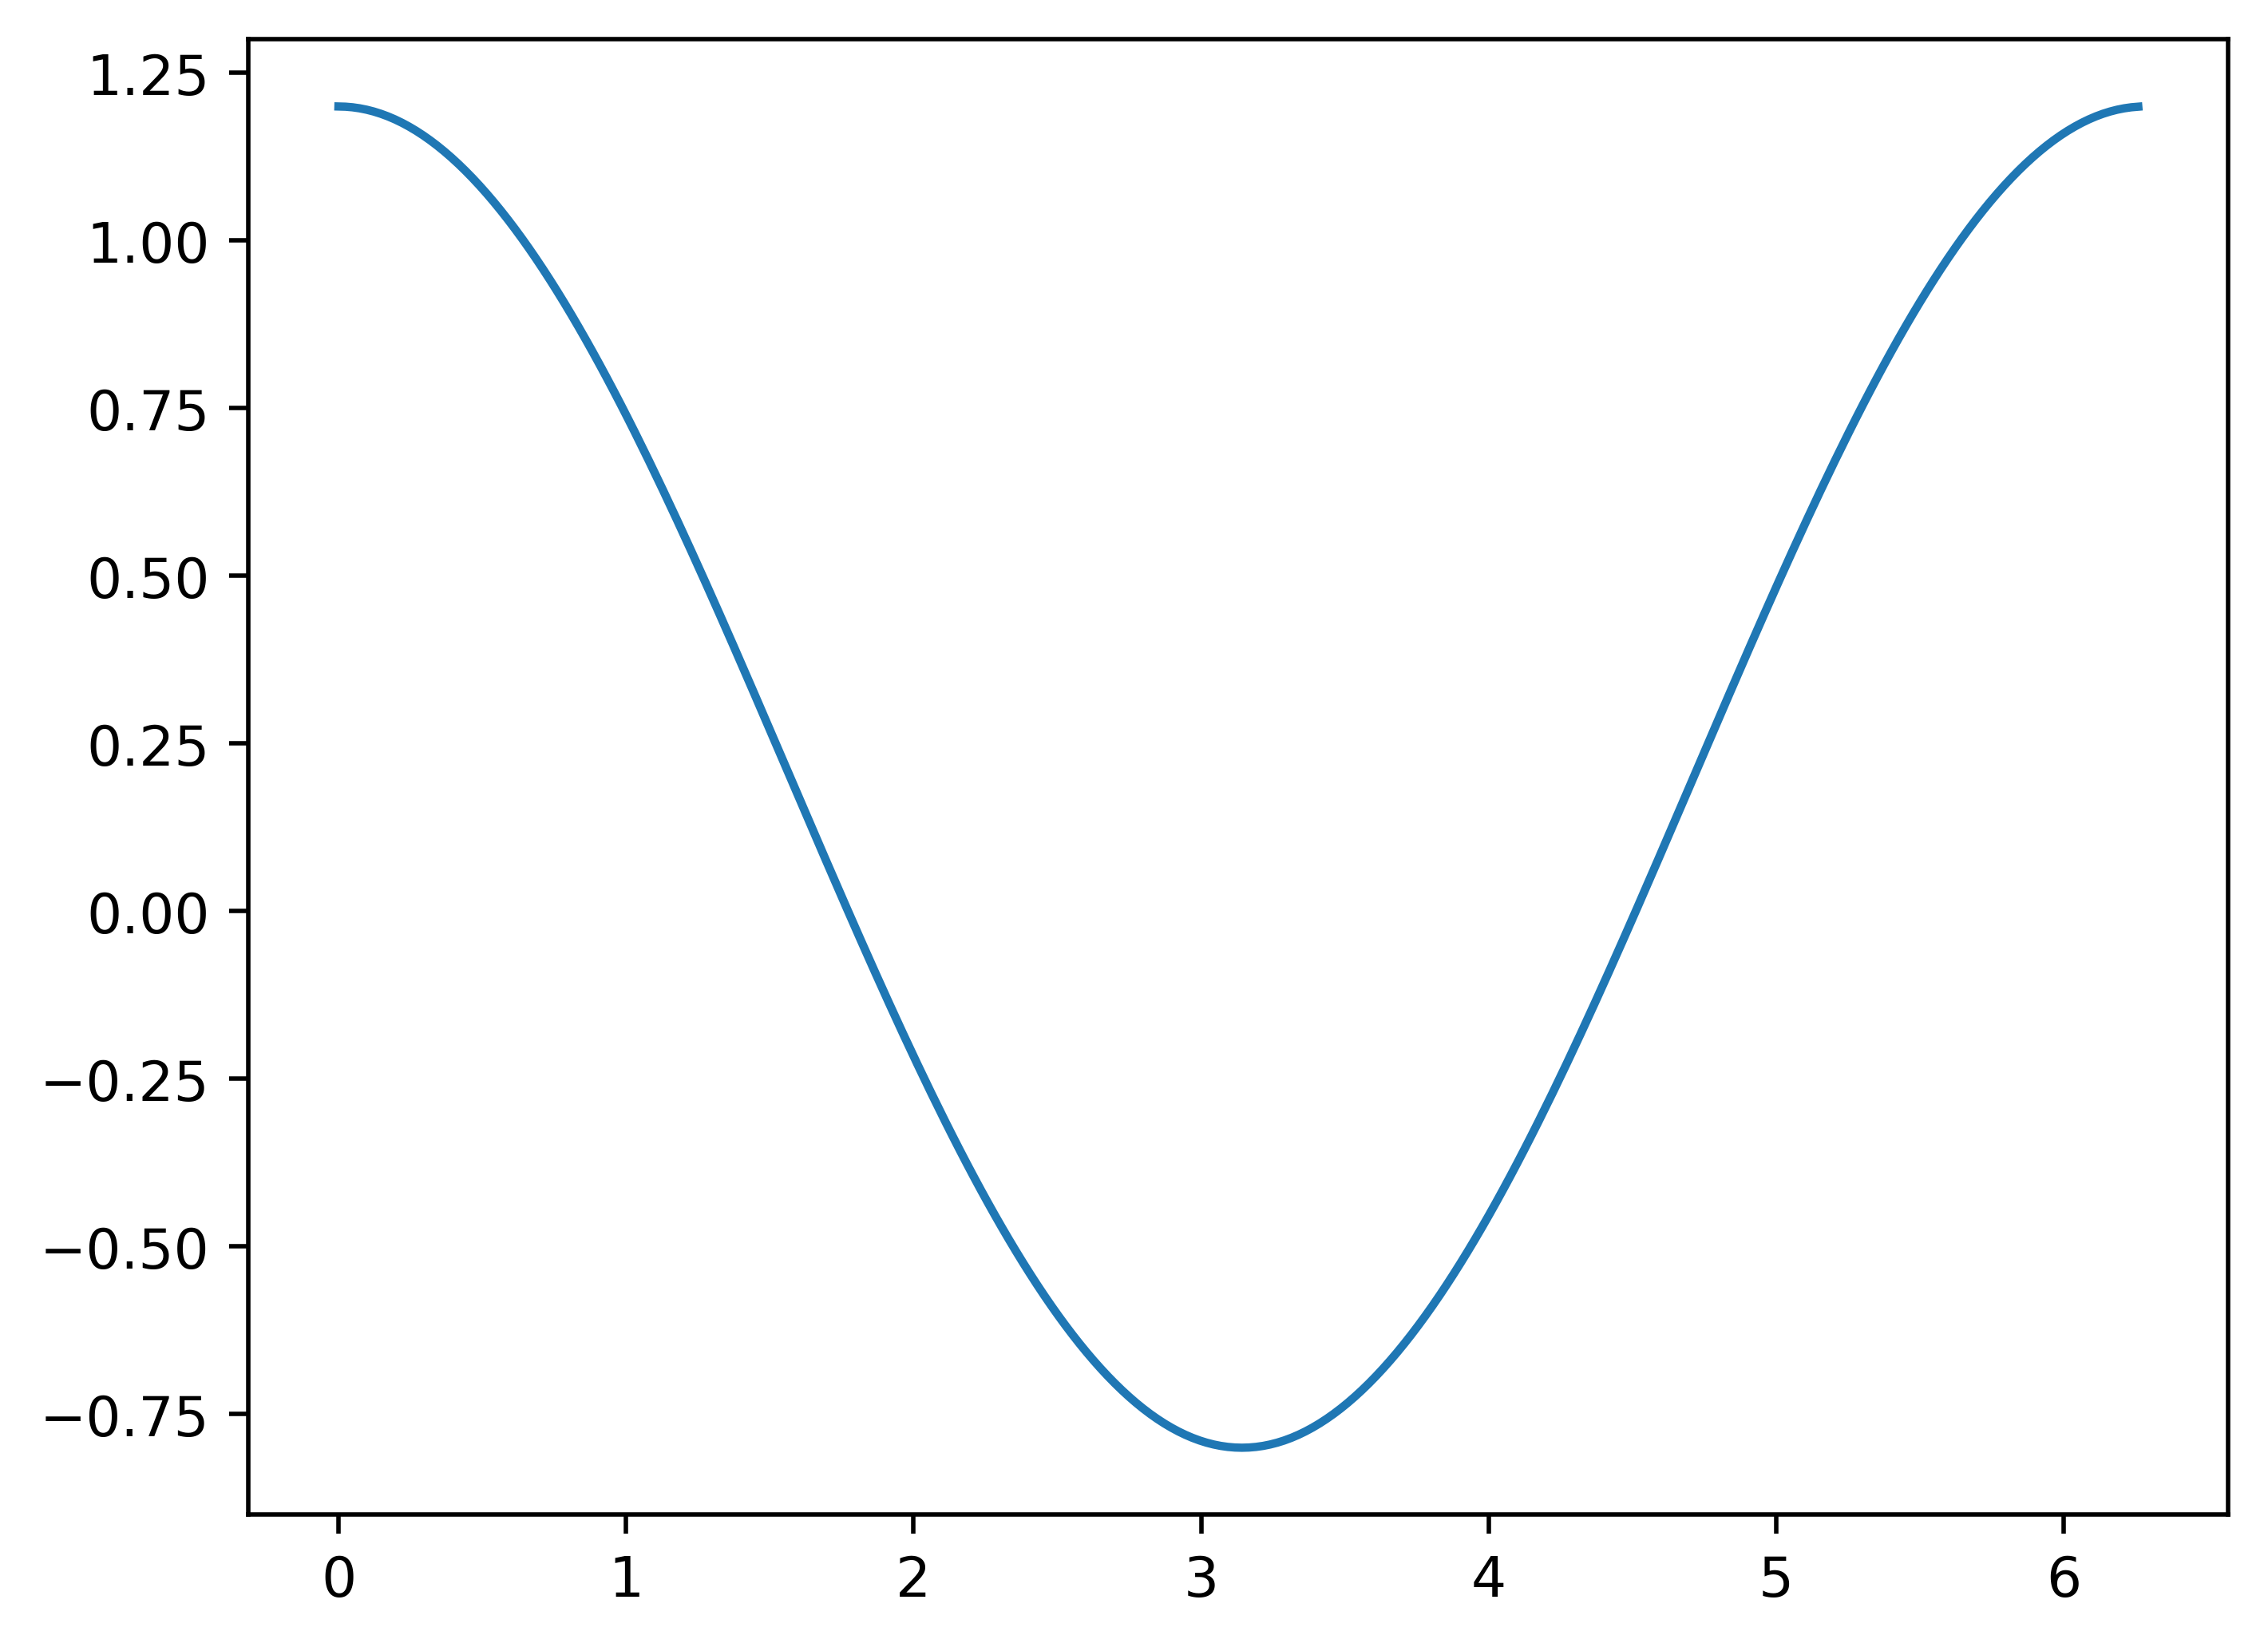

In [36]:
# There is one cycle from 0 to 2pi.
plt.plot(x,y)
plt.show()

/Users/Linda1/fsl/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/Linda1/fsl/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


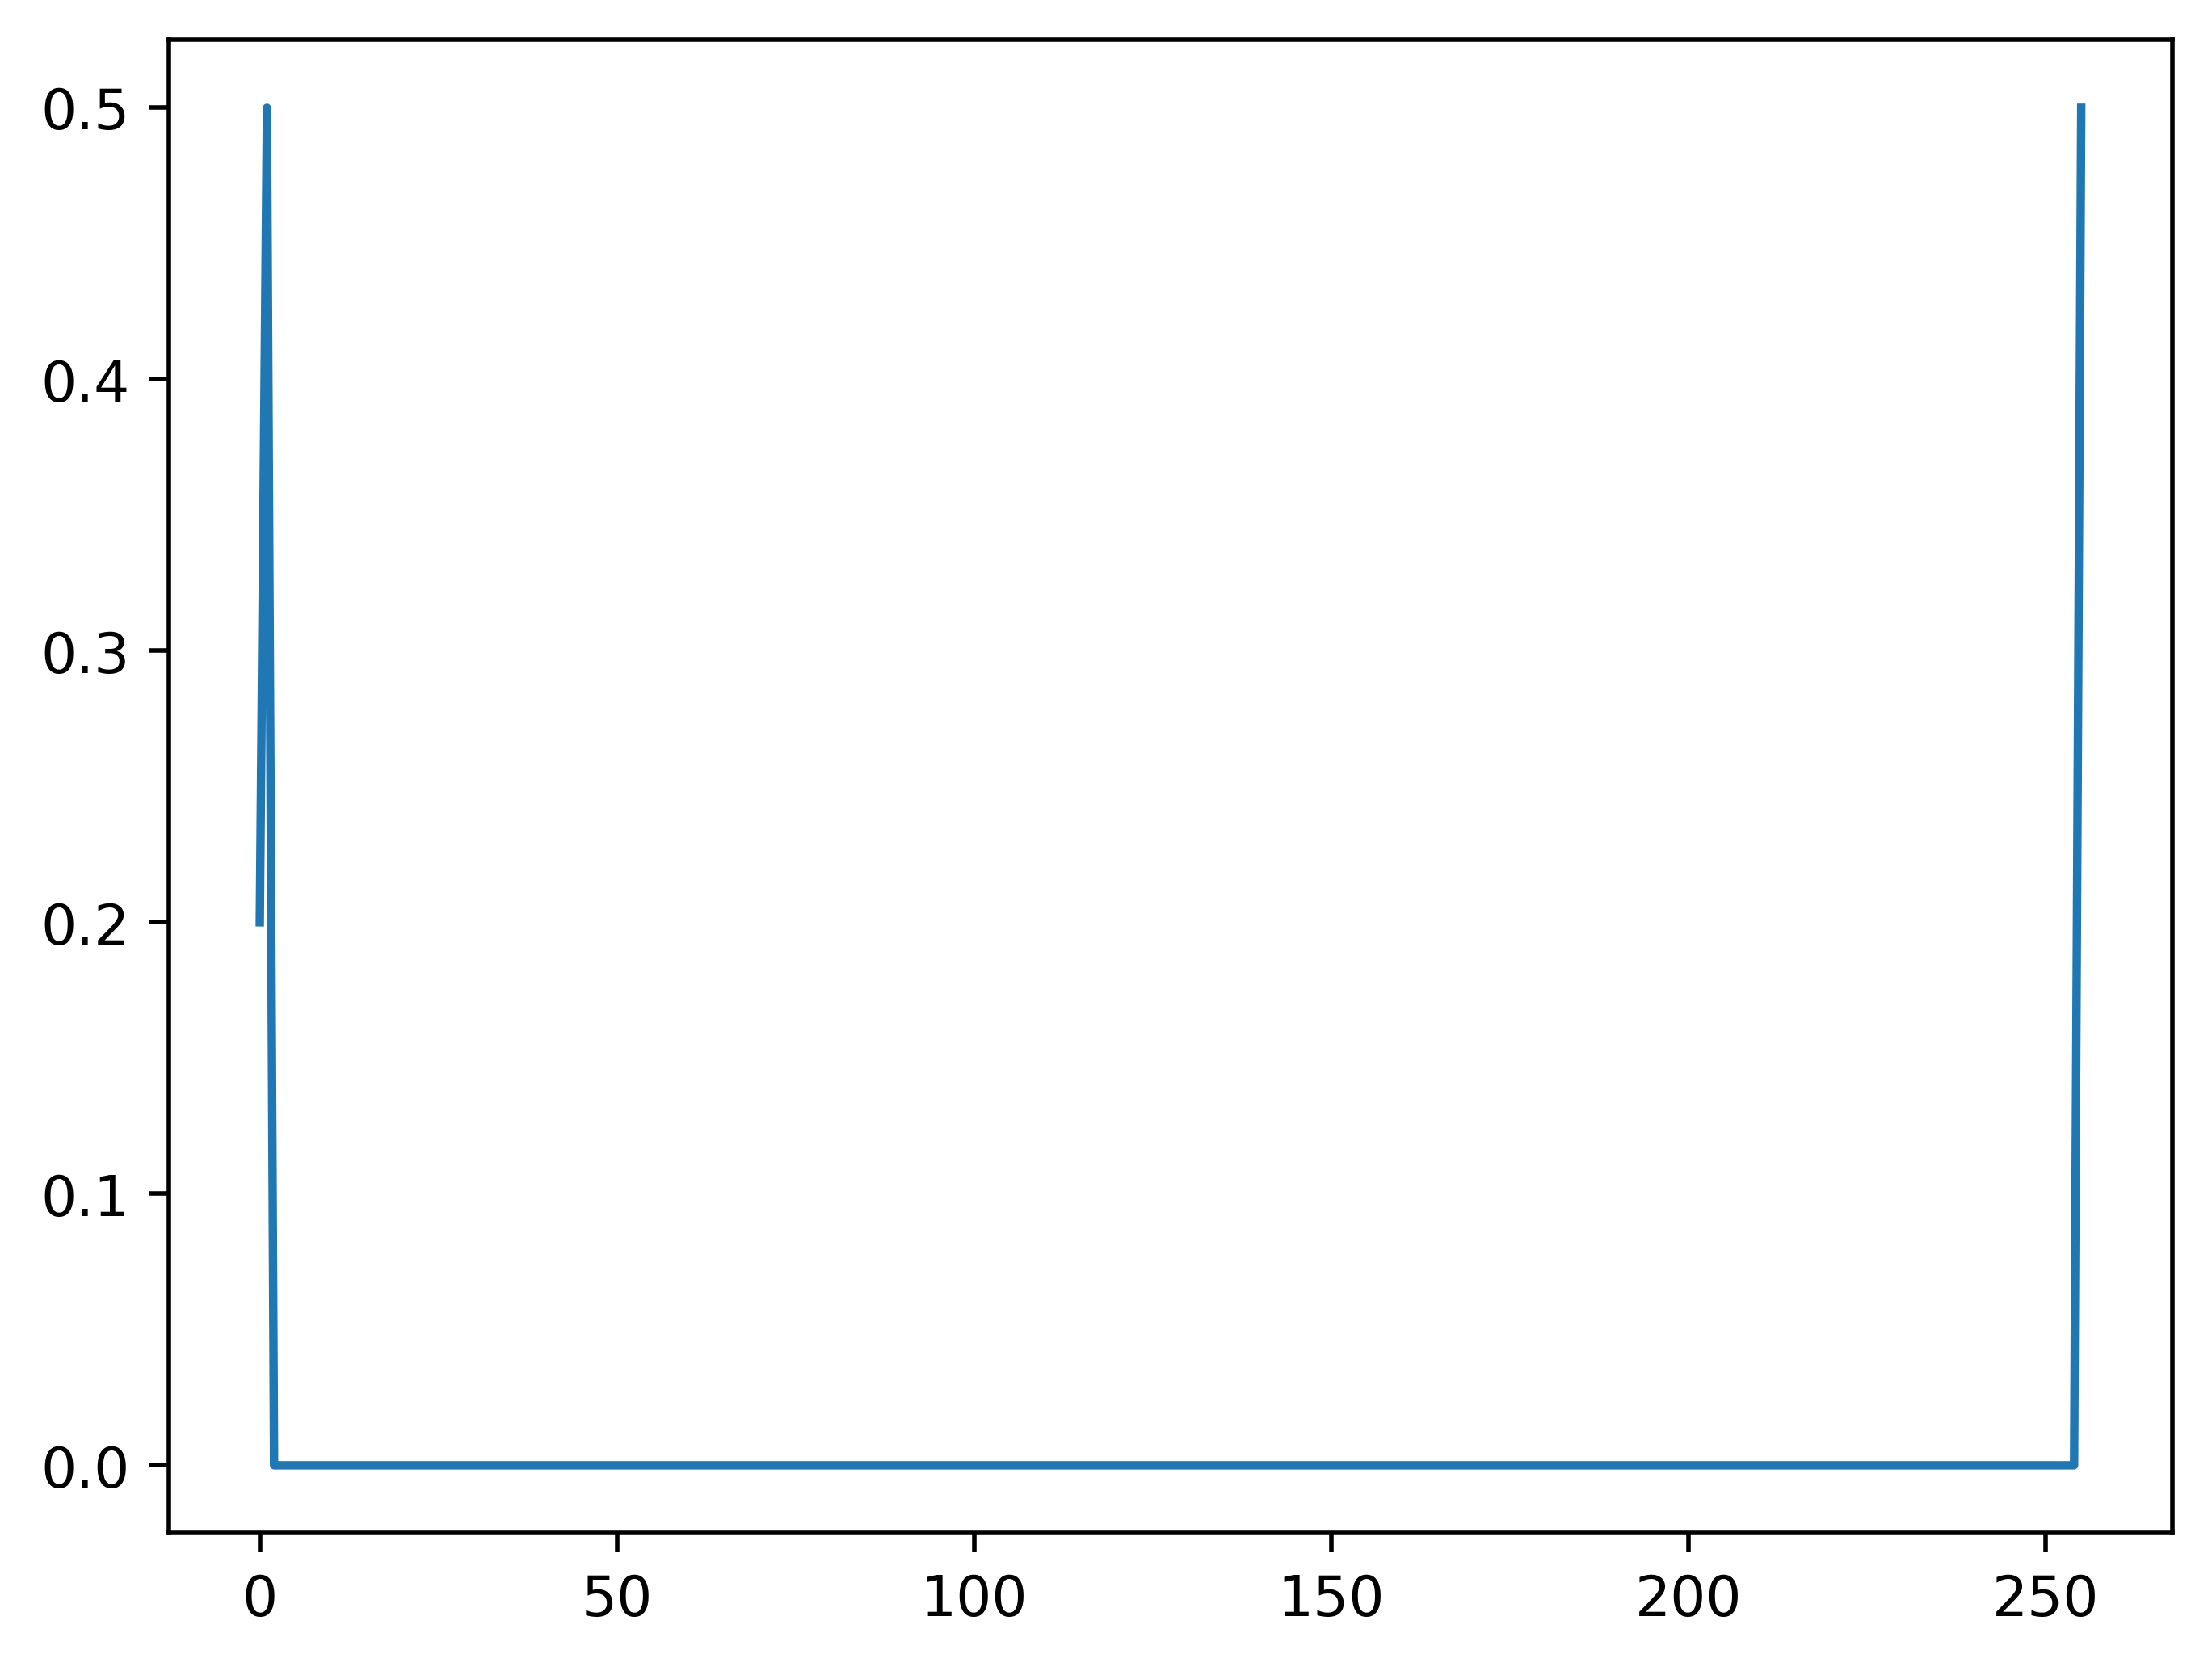

In [87]:
plt.plot(z)
plt.show()

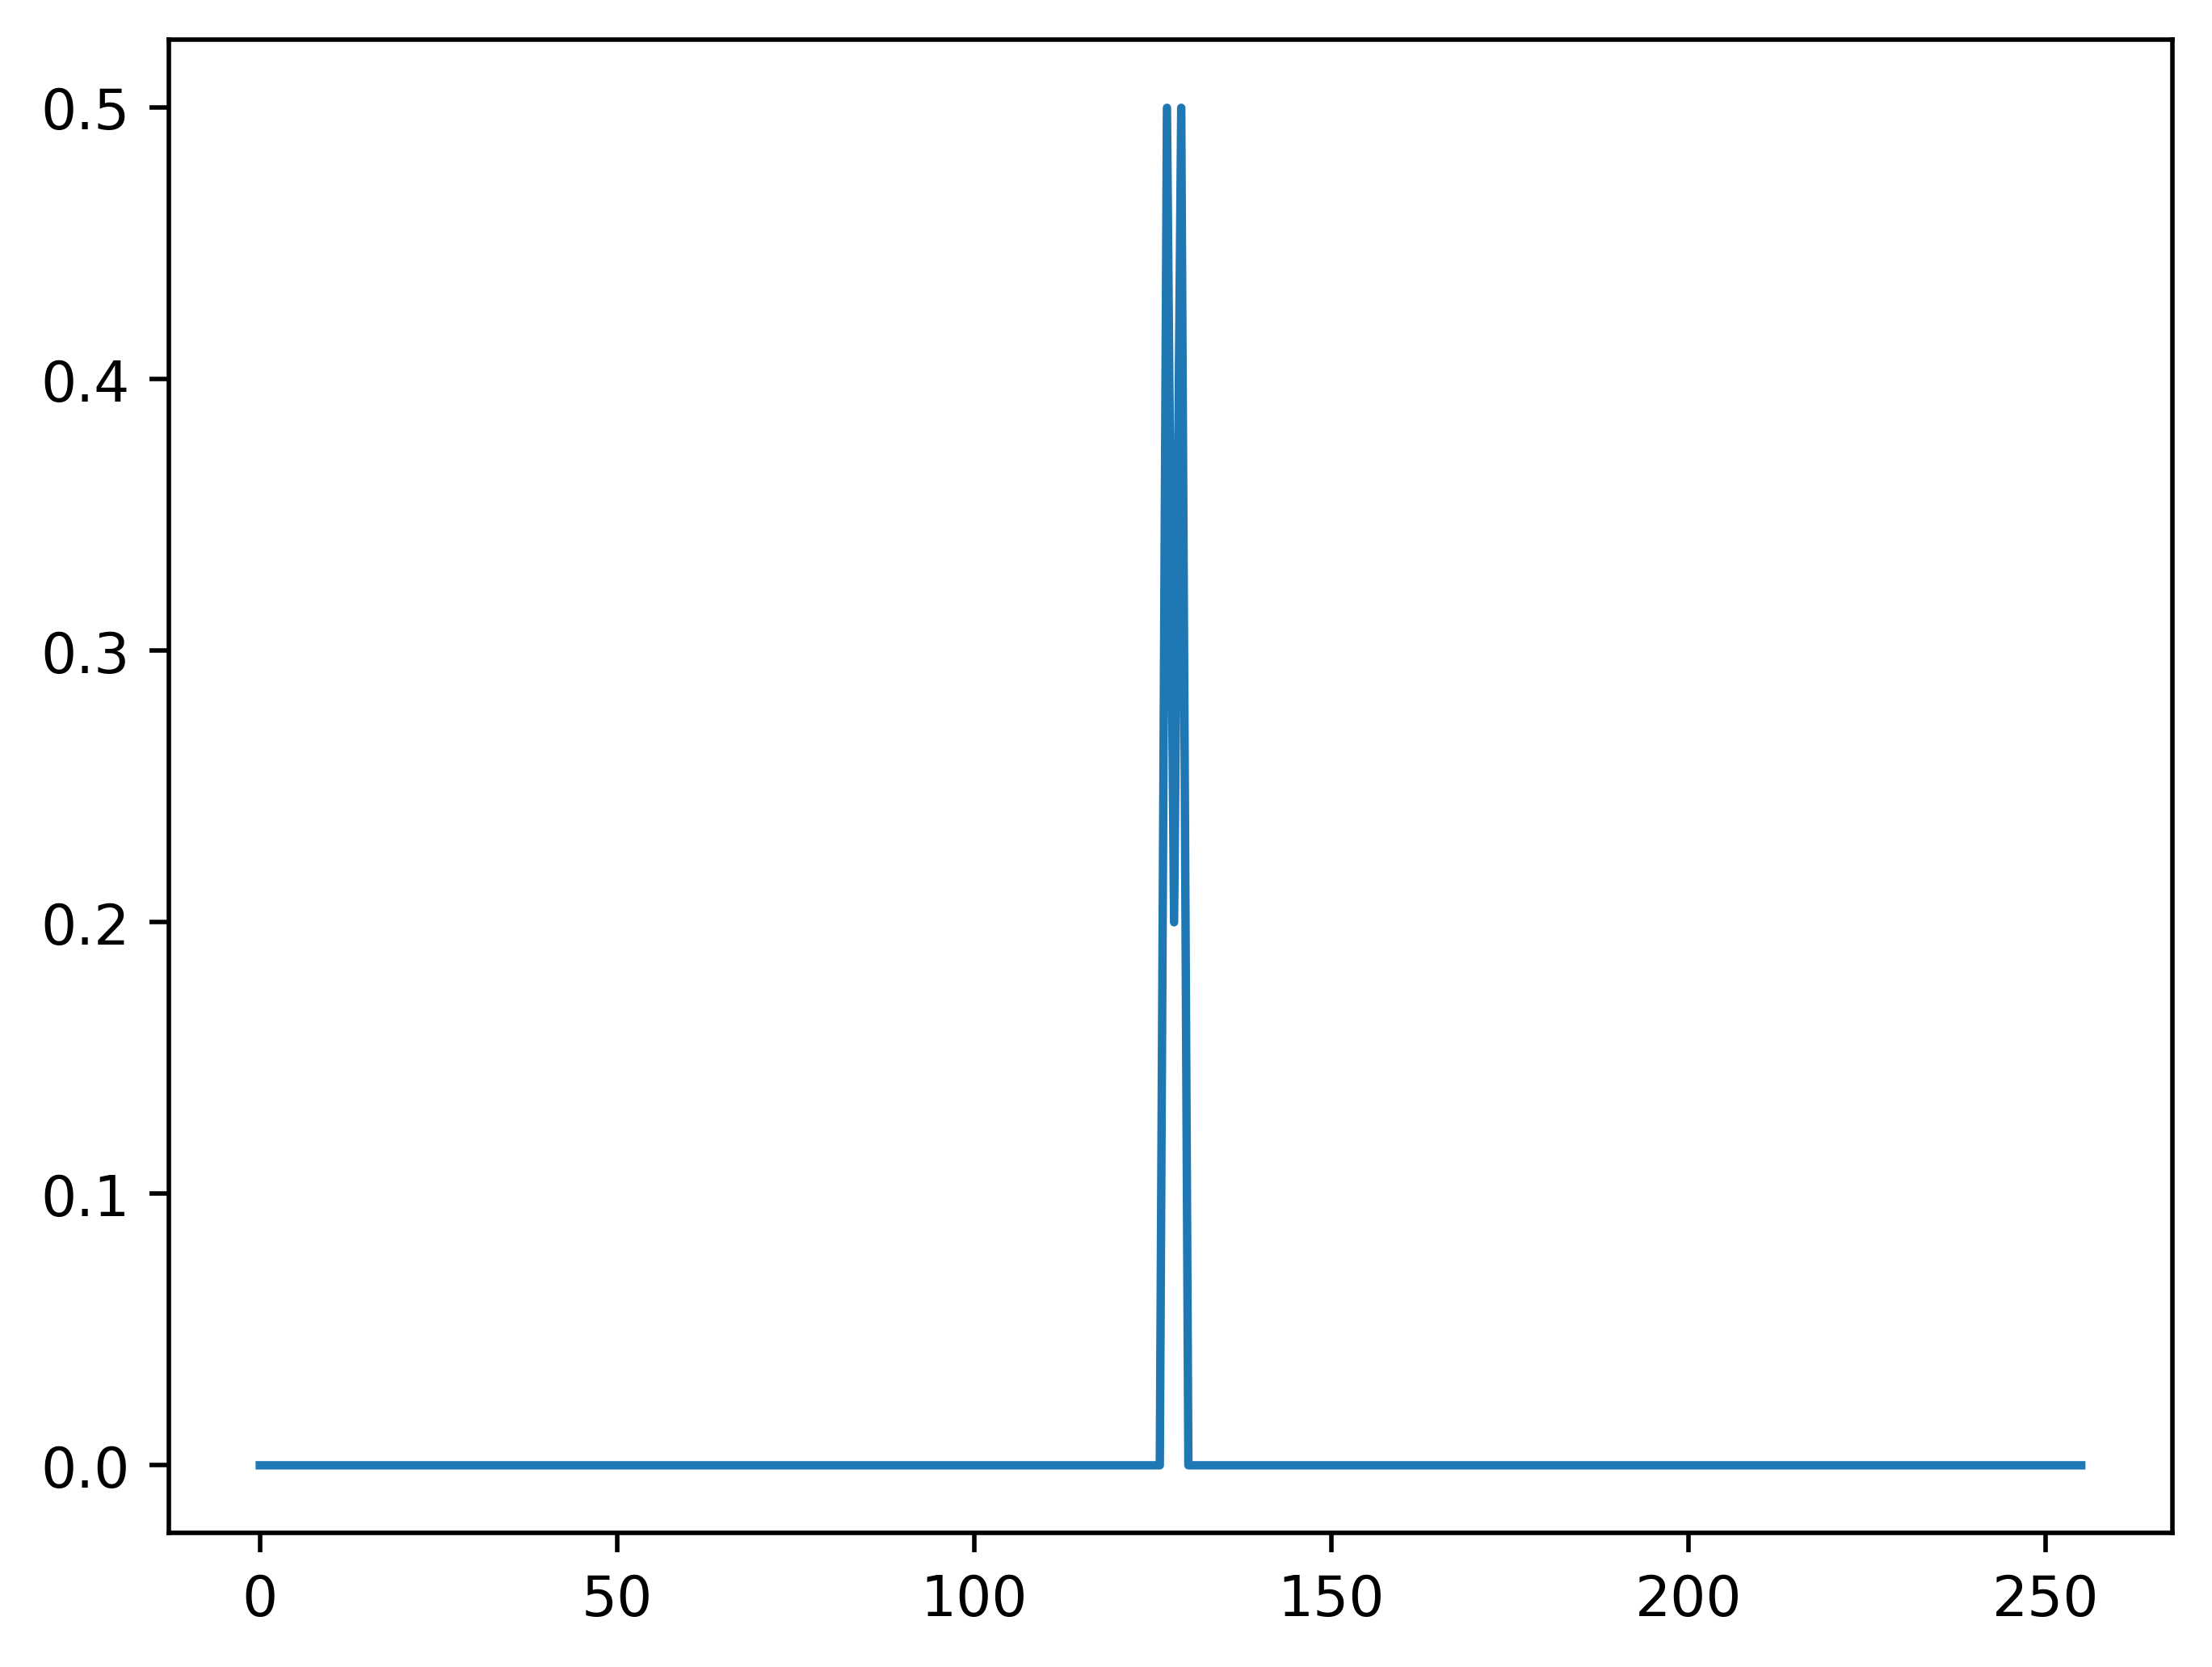

In [88]:
plt.plot(np.abs(np.fft.fftshift(z)))
plt.show()

In [39]:
# Inspect the values of z(1), z(2), and z(3)
z[0]

(0.3999999999999999+0j)

In [40]:
z[1]

(1-1.3053794156725473e-16j)

In [41]:
z[2]

(1.9230692329360393e-17+4.157101758208813e-18j)

In [42]:
from numpy import real
real1 = real(z[1])
real2 = real(z[2])

In [43]:
from numpy import imag
imag1 = imag(z[1])
imag2 = imag(z[2])

In [44]:
amp1 = np.sqrt(real1**2+imag1**2)
amp2 = np.sqrt(real2**2+imag2**2)

'''
For task 1, write a MATLAB (or Python) equation that will produce the amplitude of a
complex number, and paste that in your assignment:
amp = np.sqrt(real_part**2+imaginary_part**2)'''


'\nFor task 1, write a MATLAB (or Python) equation that will produce the amplitude of a\ncomplex number, and paste that in your assignment:\namp = np.sqrt(real_part**2+imaginary_part**2)'

In [45]:
print(amp1,amp2)

1.0 1.9674883036364498e-17


In [46]:
y2 = np.cos(x)*2
y3 = np.cos(x*3)
y5 = np.cos(x*5)+0.7

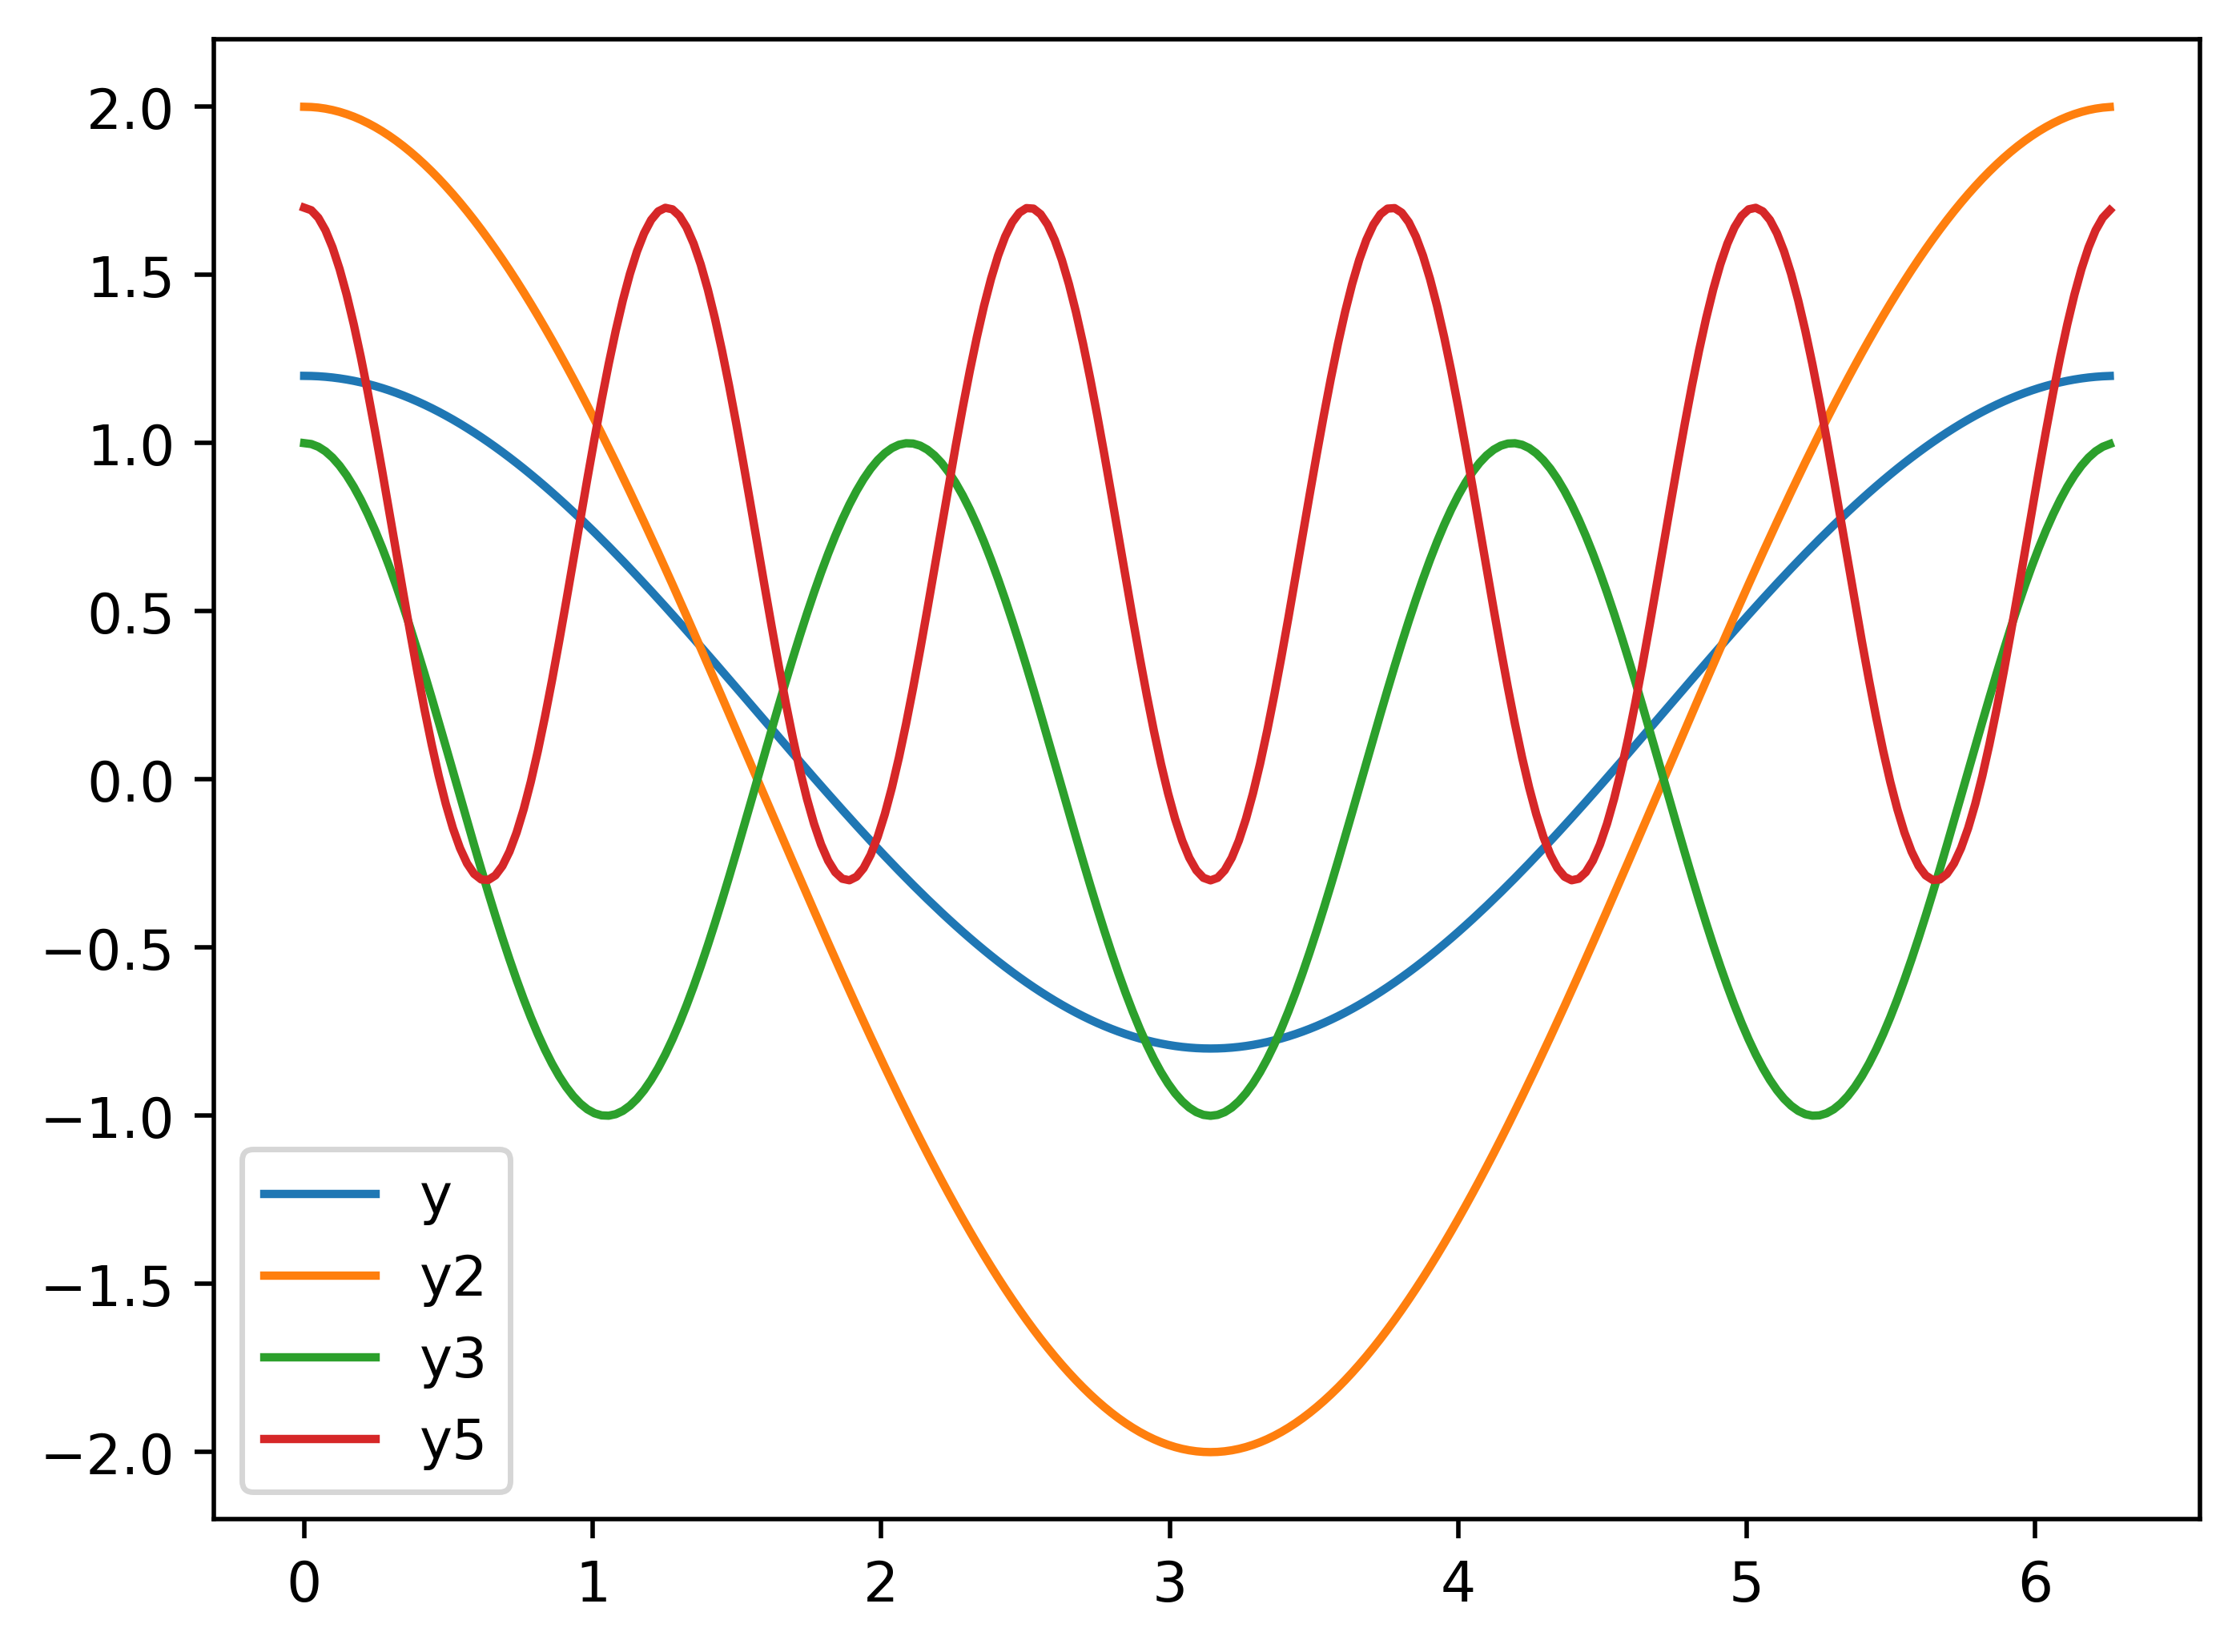

In [47]:
plt.plot(x,y,label = 'y')
plt.plot(x,y2,label='y2')
plt.plot(x,y3,label='y3')
plt.plot(x,y5,label='y5')
plt.legend()
plt.show()

In [48]:
z2 = np.fft.fft(y2)/len(y2)*2
z3 = np.fft.fft(y3)/len(y3)*2
z5 = np.fft.fft(y5)/len(y5)*2

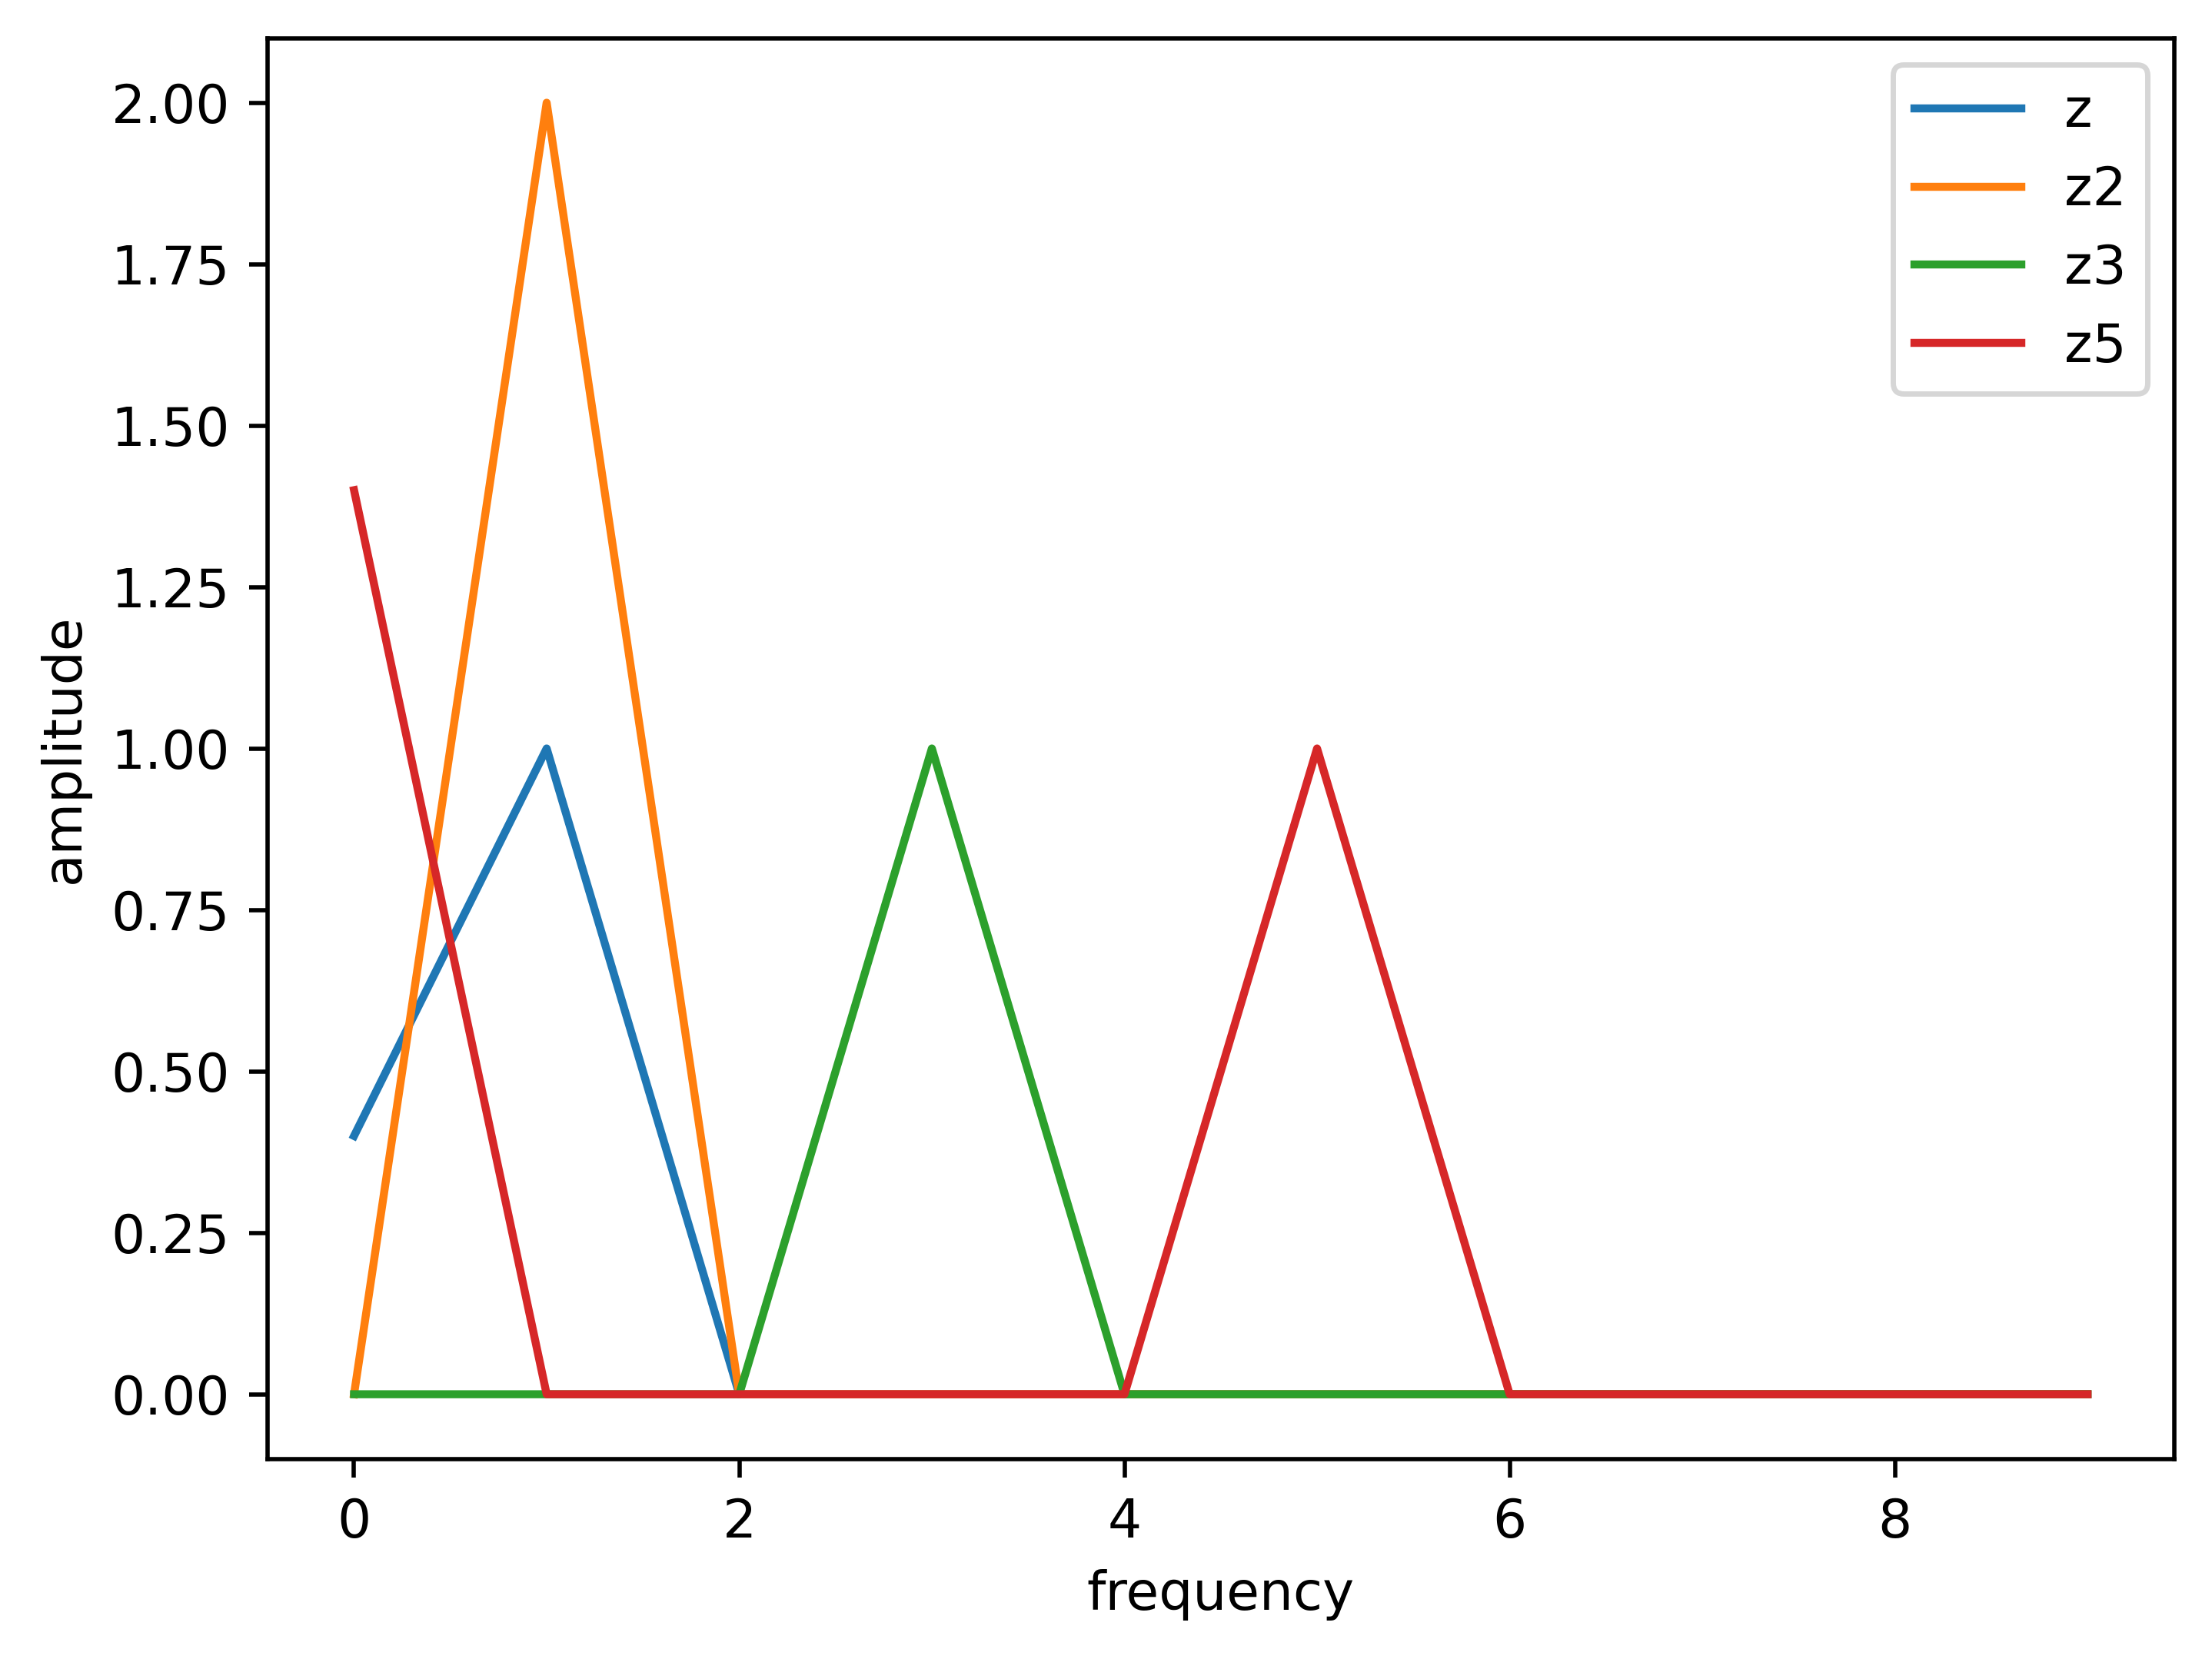

In [49]:
'''
plot the absolute values for the FFT results for entries 1-10 (e.g., z(1:10))
using the same color-coding scheme, after performing the FFT on y, y2, y3, and y5.
'''
plt.plot(abs(z[:10]), label='z')
plt.plot(abs(z2[:10]),label='z2')
plt.plot(abs(z3[:10]),label='z3')
plt.plot(abs(z5[:10]),label='z5')
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.legend()
plt.show()

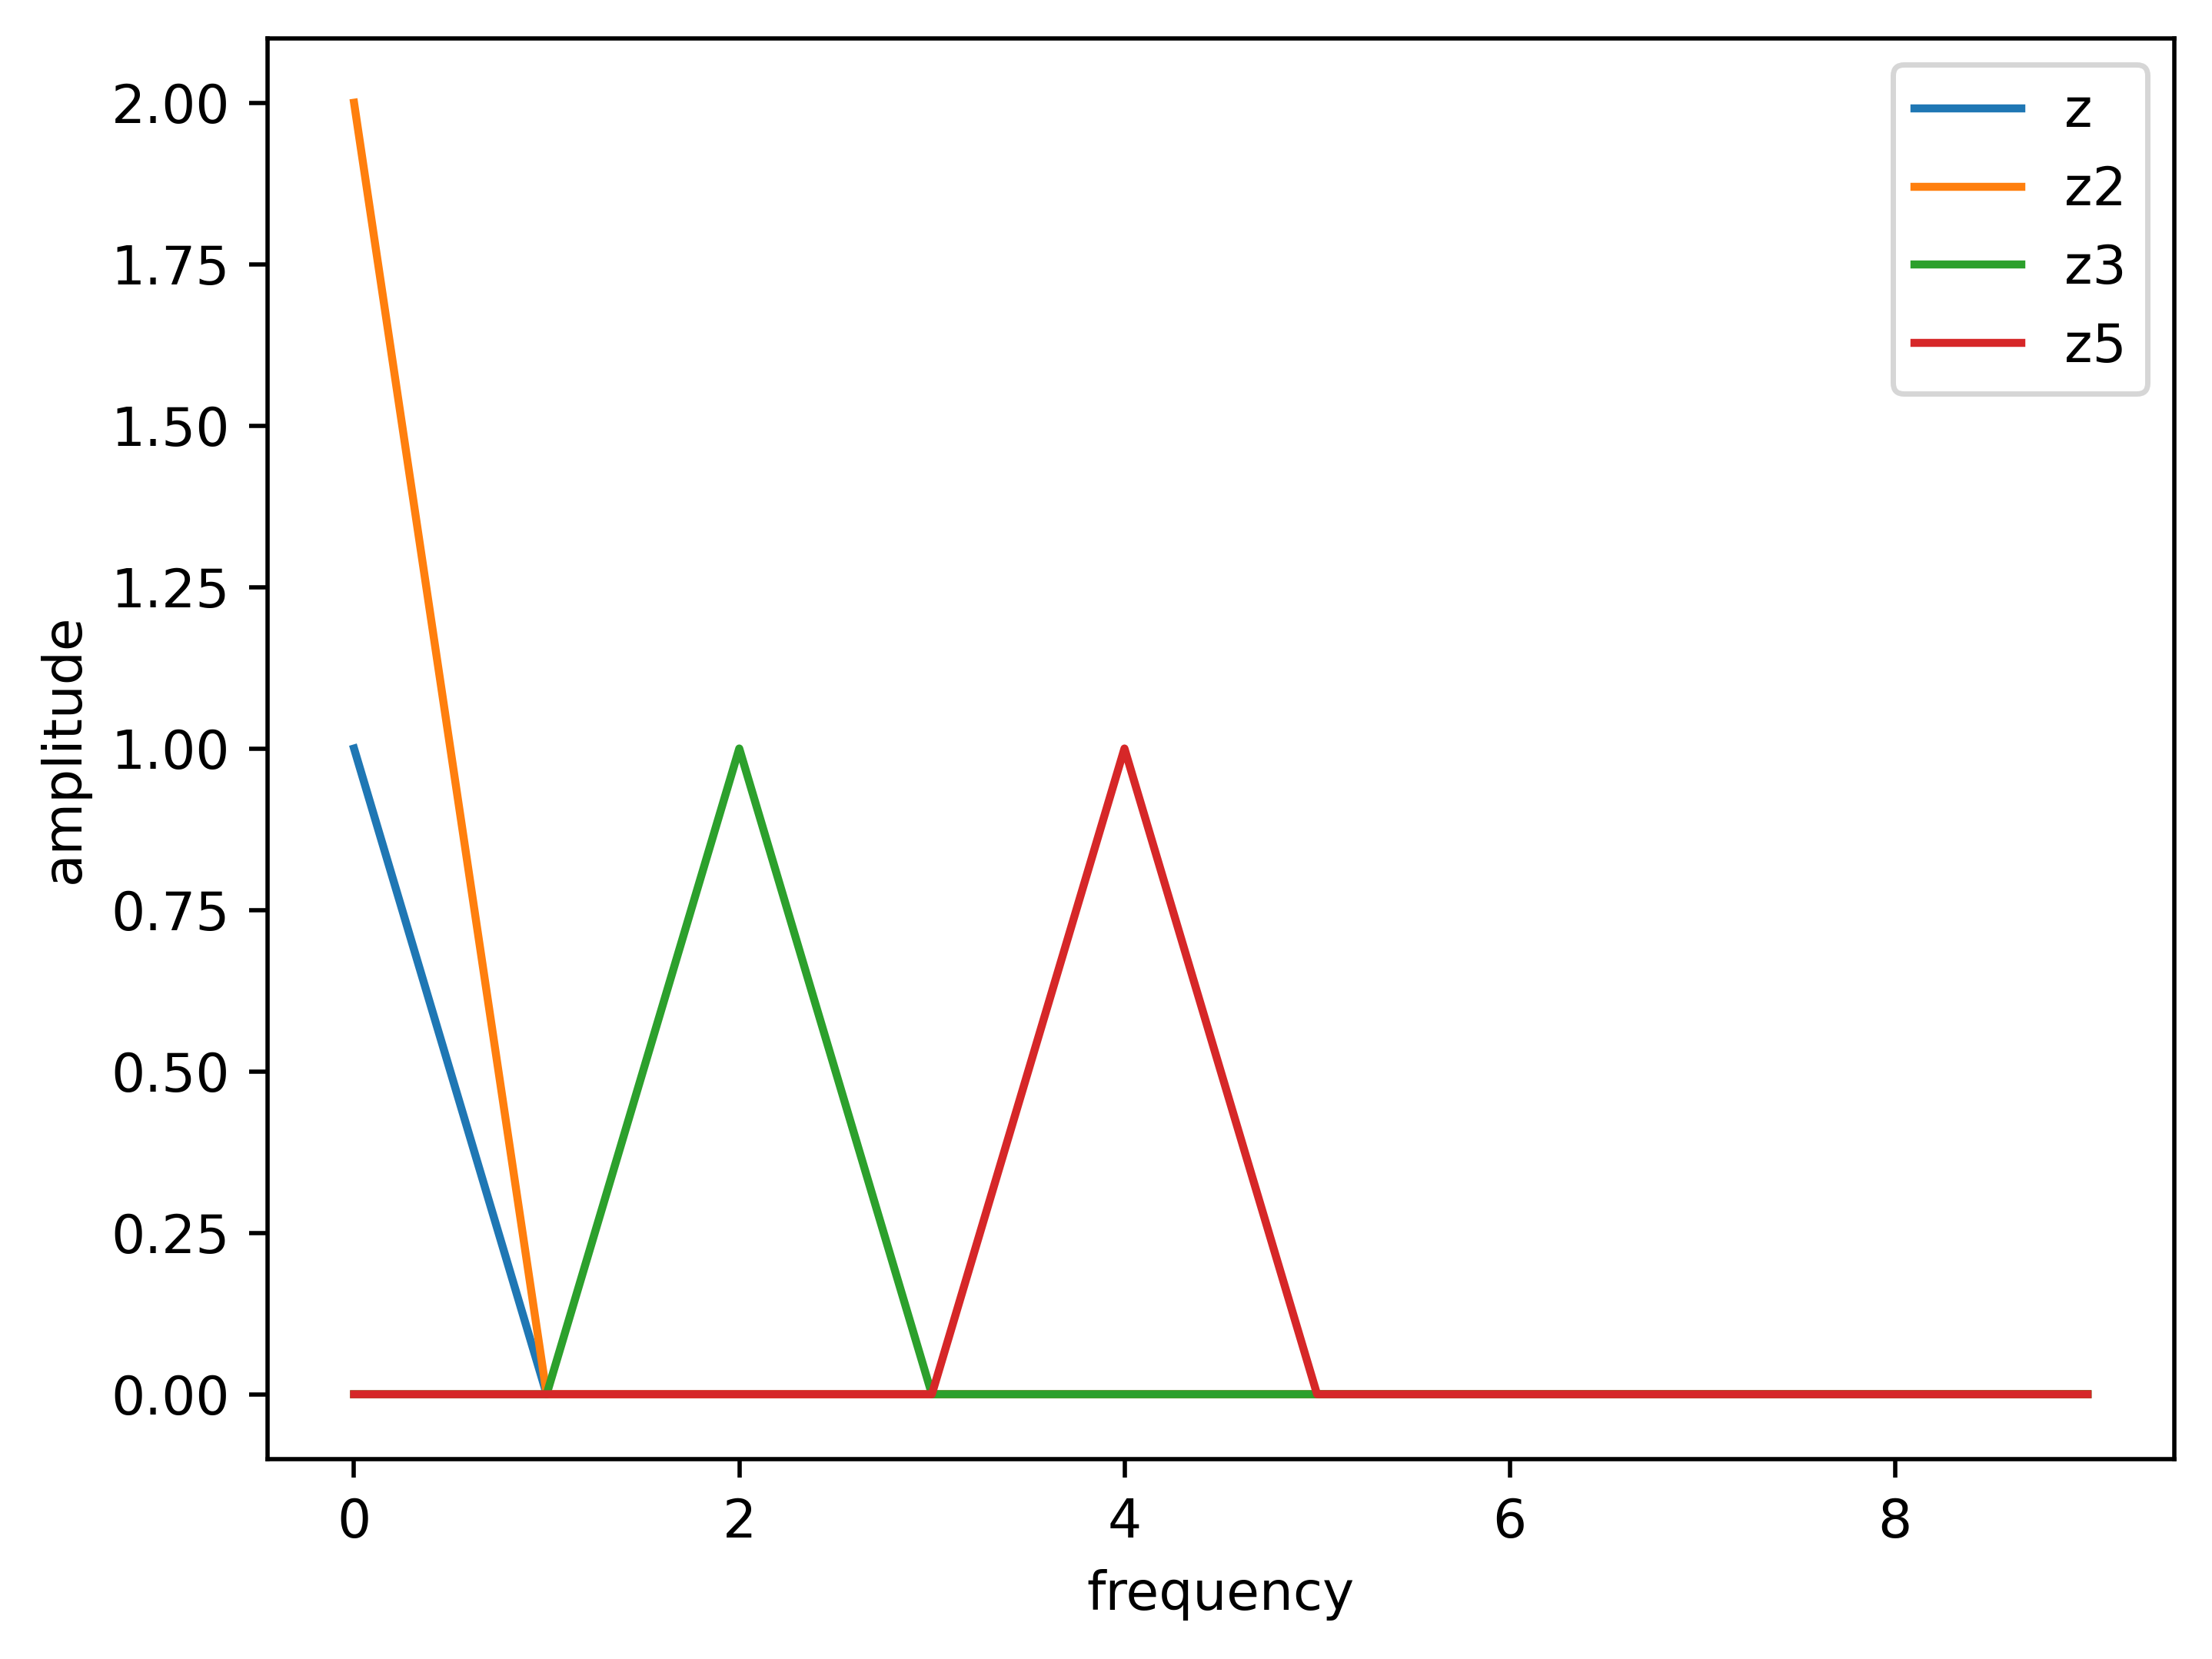

In [50]:
'''
Now, create a final figure here, but plot the absolute values of the FFT for entries 2-11, and
assign appropriate labels for the abscissa and ordinate axes.
'''
plt.plot(abs(z[1:11]), label='z')
plt.plot(abs(z2[1:11]),label='z2')
plt.plot(abs(z3[1:11]),label='z3')
plt.plot(abs(z5[1:11]),label='z5')
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.legend()
plt.show()

In [ ]:
'''
Next, write a few sentences to explain what the FFT output means for the values in z(1),
z(2), z(3),… and so forth; what they correspond to? What do the terms DC component and
fundamental frequency mean? Does a change in the DC component have any effect on the
fundamental?
How are the values different for y and y2, and what does that mean? What is happening with
respect to y3 and y5, in comparison to y?
'''

The Fourier transform allows us to represent any function as the sum of its constituent frequencies. Z values are the results of decomposition of original waveform. In doing the FFT, rather than decomposing a signal in terms of sines and cosines, it is decomposed in terms of complex numbers using Euler's theorem.

DC component corresponds to zero frequency, which is the average brightness across the whole image. Fundamental frequency is the lowest frequency of the waveform. DC component does not affect fundamental frequency.

y2 is approximately two times of y, so y2 has twice the amplitude of y. For y3, it oscillates three times faster than y. Since the frequency of y is 1 cycle per 2π radians, the frequency of y3 is three cycles per 2π. For y5, it oscillates 5 times faster than y, and y5 is shifted upward by 0.5 compared to y.


## task2

In [52]:
y = np.cos(x)
phz = -np.pi/6
y2 = np.cos(x+phz)
phz = np.pi*5/4
y3 = np.cos(x+phz)

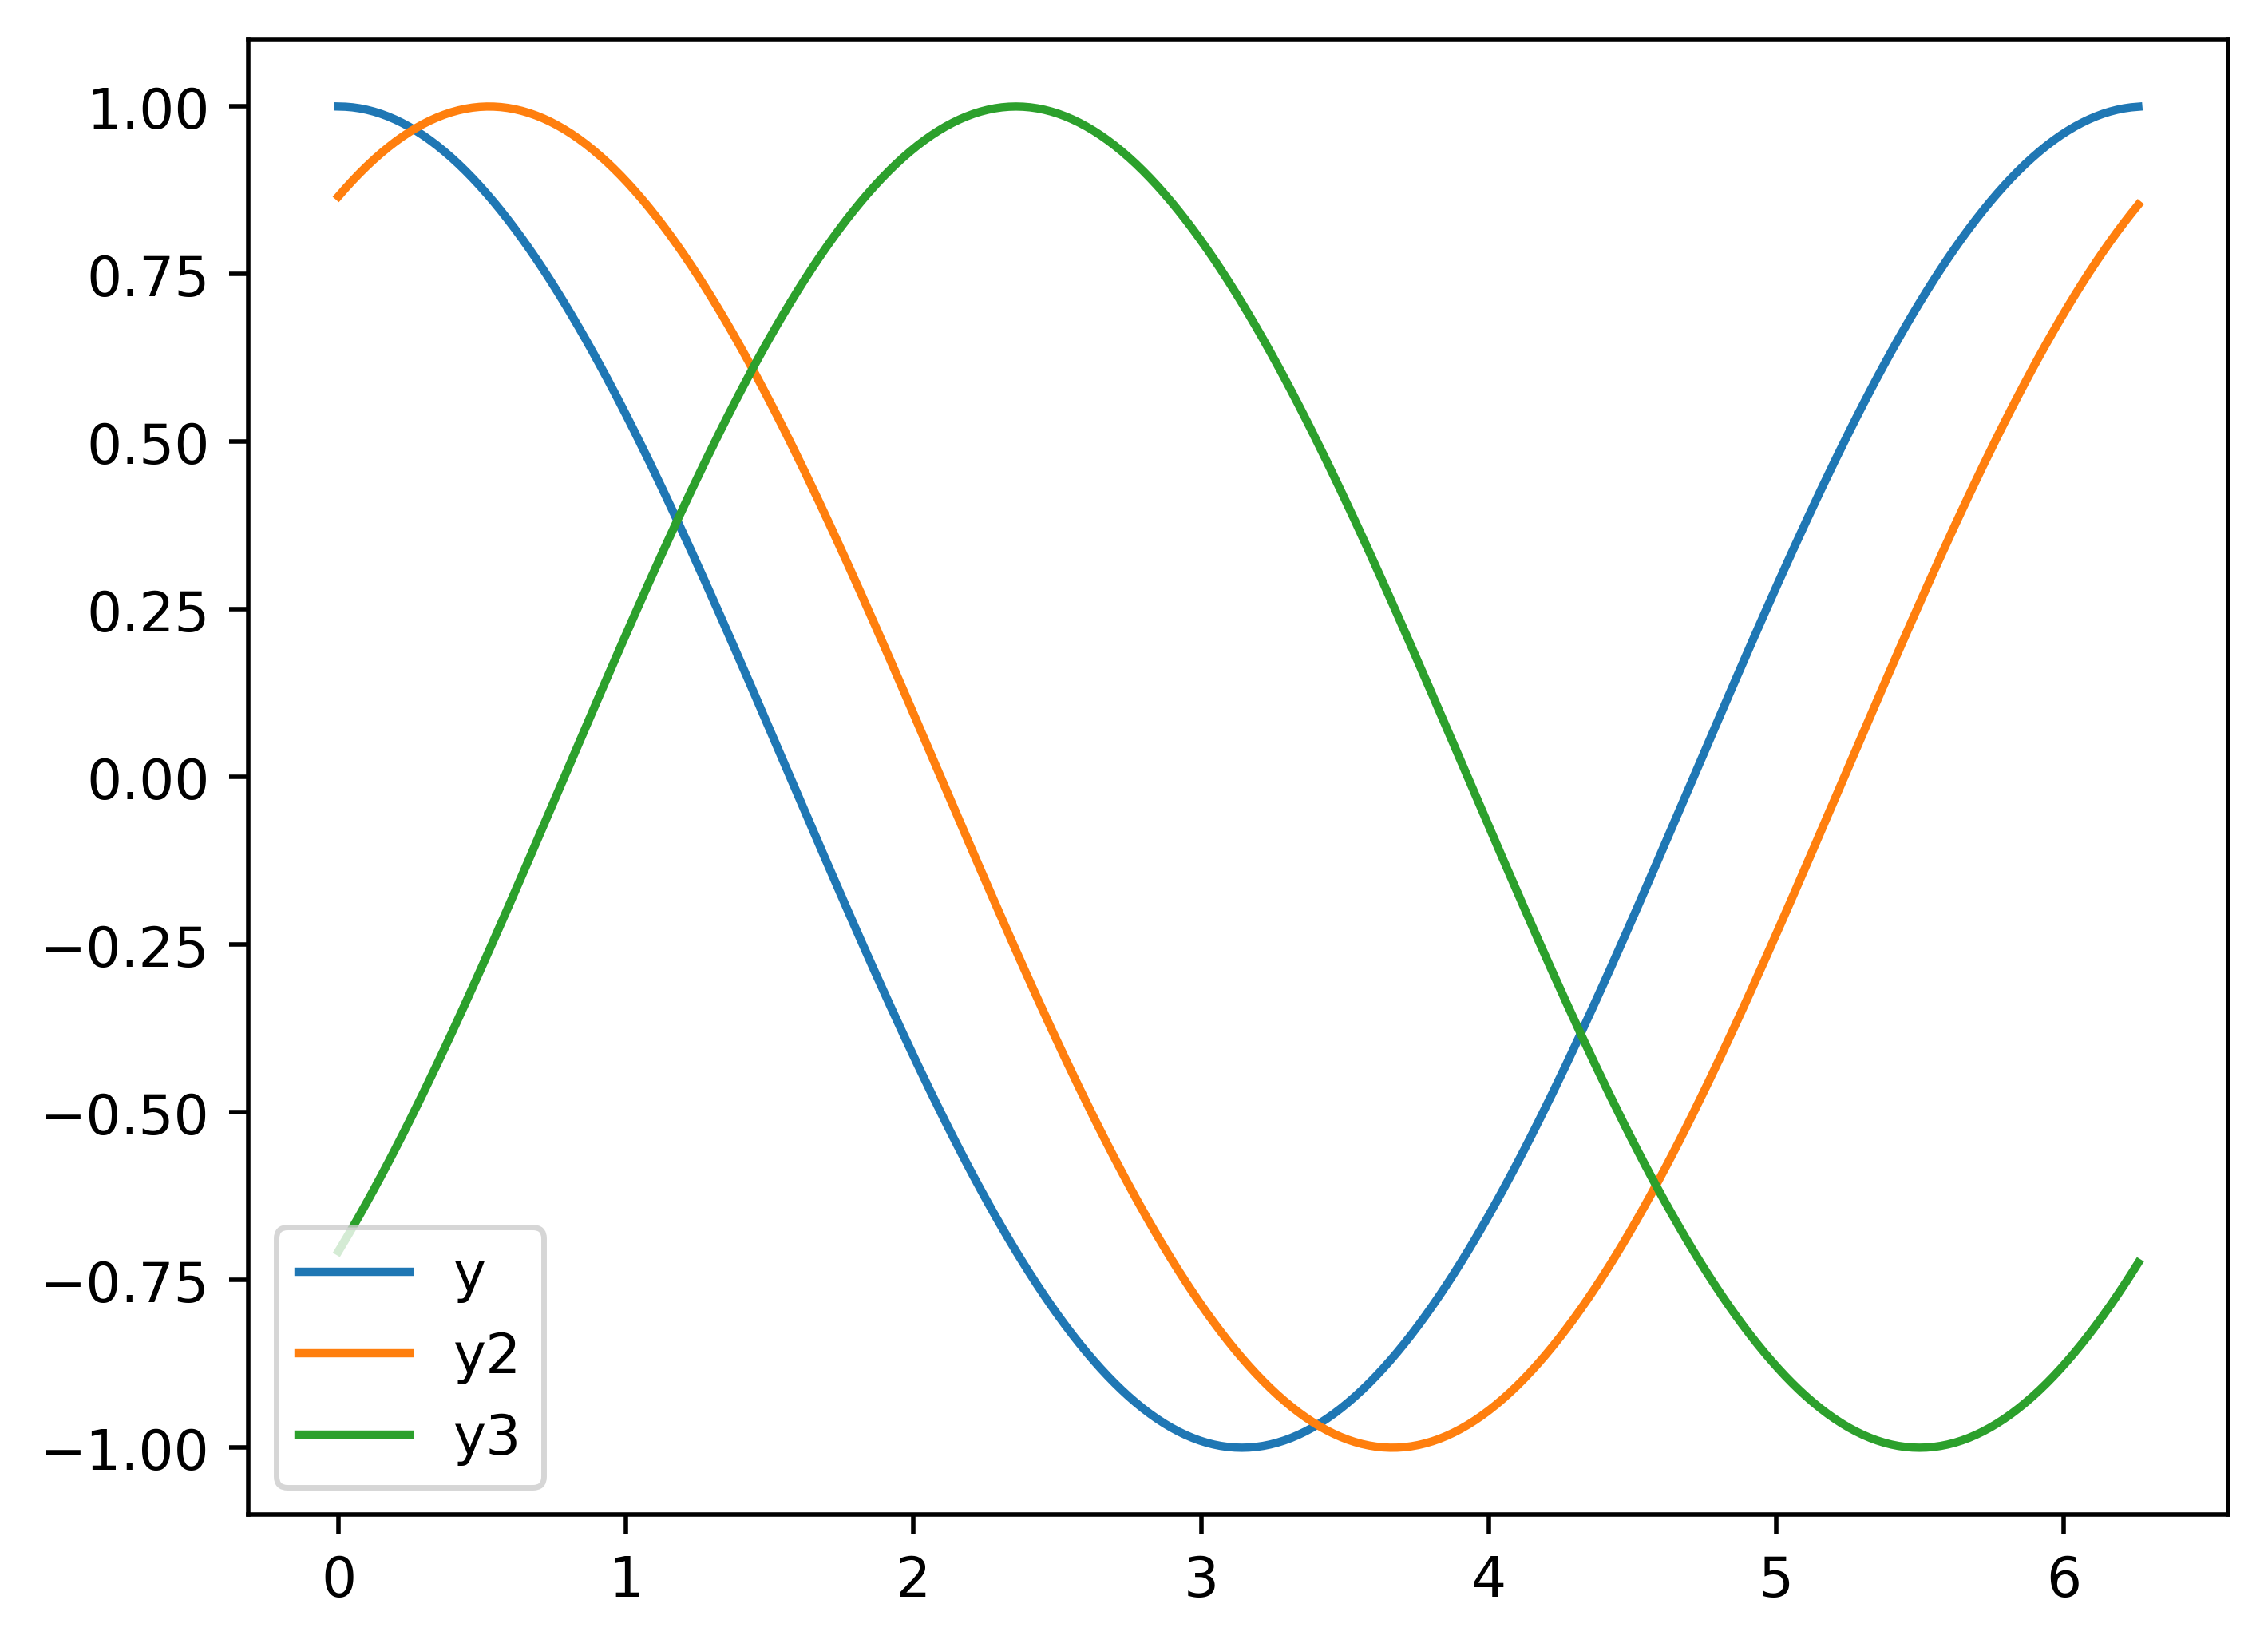

In [54]:
plt.plot(x,y,label='y')
plt.plot(x,y2,label='y2')
plt.plot(x,y3,label='y3')
plt.legend(loc='lower left')
plt.show()

There is no change to the amplitude of the fundamental frequency.

In [55]:
y_fft = np.fft.fft(y)/len(y)*2
y2_fft = np.fft.fft(y2)/len(y2)*2
y3_fft = np.fft.fft(y3)/len(y3)*2

In [57]:
from math import atan2
from numpy import angle
y_phz_fund = atan2(imag(y_fft[1]), real(y_fft[1]))
y2_phz_fund = atan2(imag(y2_fft[1]), real(y2_fft[1]))
y3_phz_fund = atan2(imag(y3_fft[1]), real(y3_fft[1]))
print(y_phz_fund,y2_phz_fund,y3_phz_fund)

-1.2594623915600944e-16 -0.523598775598299 -2.3561944901923453


In [ ]:
# The results match.
print(angle(y_fft)[1],angle(y2_fft)[1],angle(y3_fft)[1])

-1.2594623915600944e-16 -0.523598775598299 -2.3561944901923453


## task3

In [ ]:
'''Create a plot, showing sinewaves for 1F, 3F, 5F, 7F and 9F where F refers to the
frequency, and scaled by the appropriate amplitude (preferably in different colors).
'''

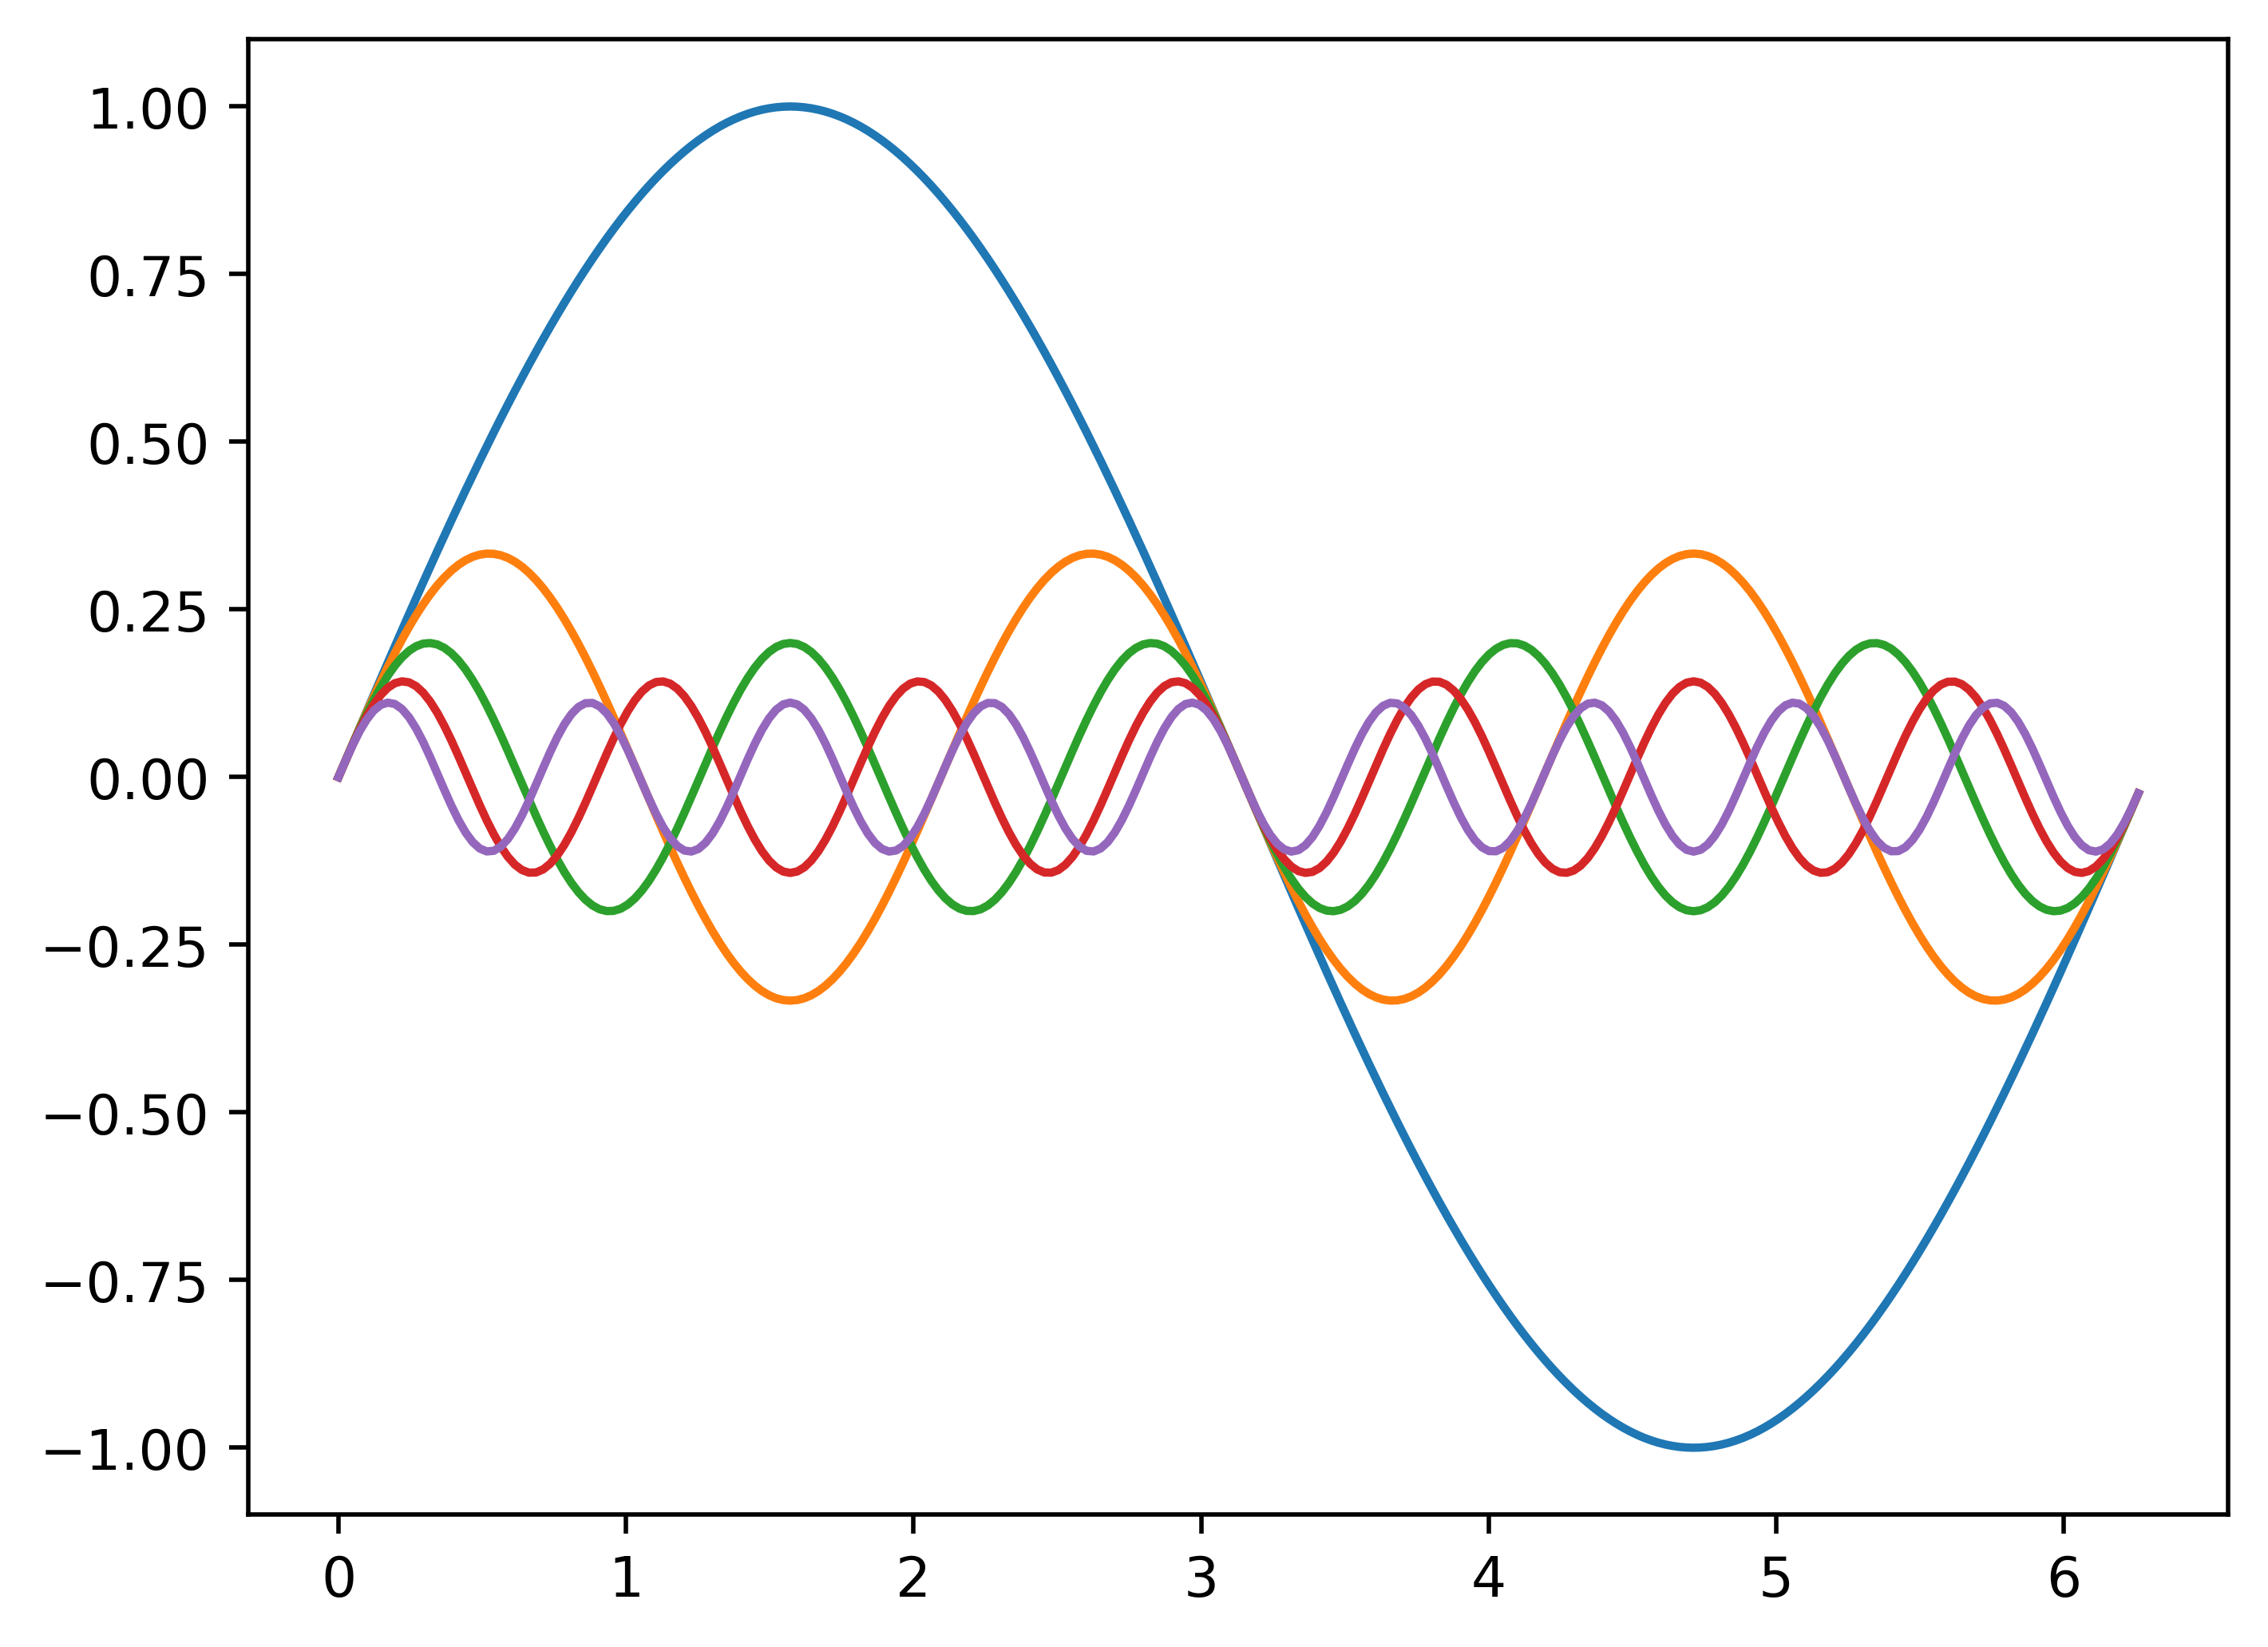

In [59]:
for F in range(1,10,2):
    amp = 1/F
    s = amp * np.sin(F*x)
    plt.plot(x,s) 

In [ ]:
'''Now calculate the sum of those frequencies and plot it. Is it shaped somewhat like a
square-wave function? Notice how portions of the summed curve reflect the sum of the
individual curves.'''

In [60]:
sum_s = []
for F in range(1,10,2):
    amp = 1/F
    sum_s.append(amp * np.sin(F*x))

In [61]:
# sum along the rows, where each row is a sin wave
sum_s = np.sum(np.vstack(sum_s), axis=0)

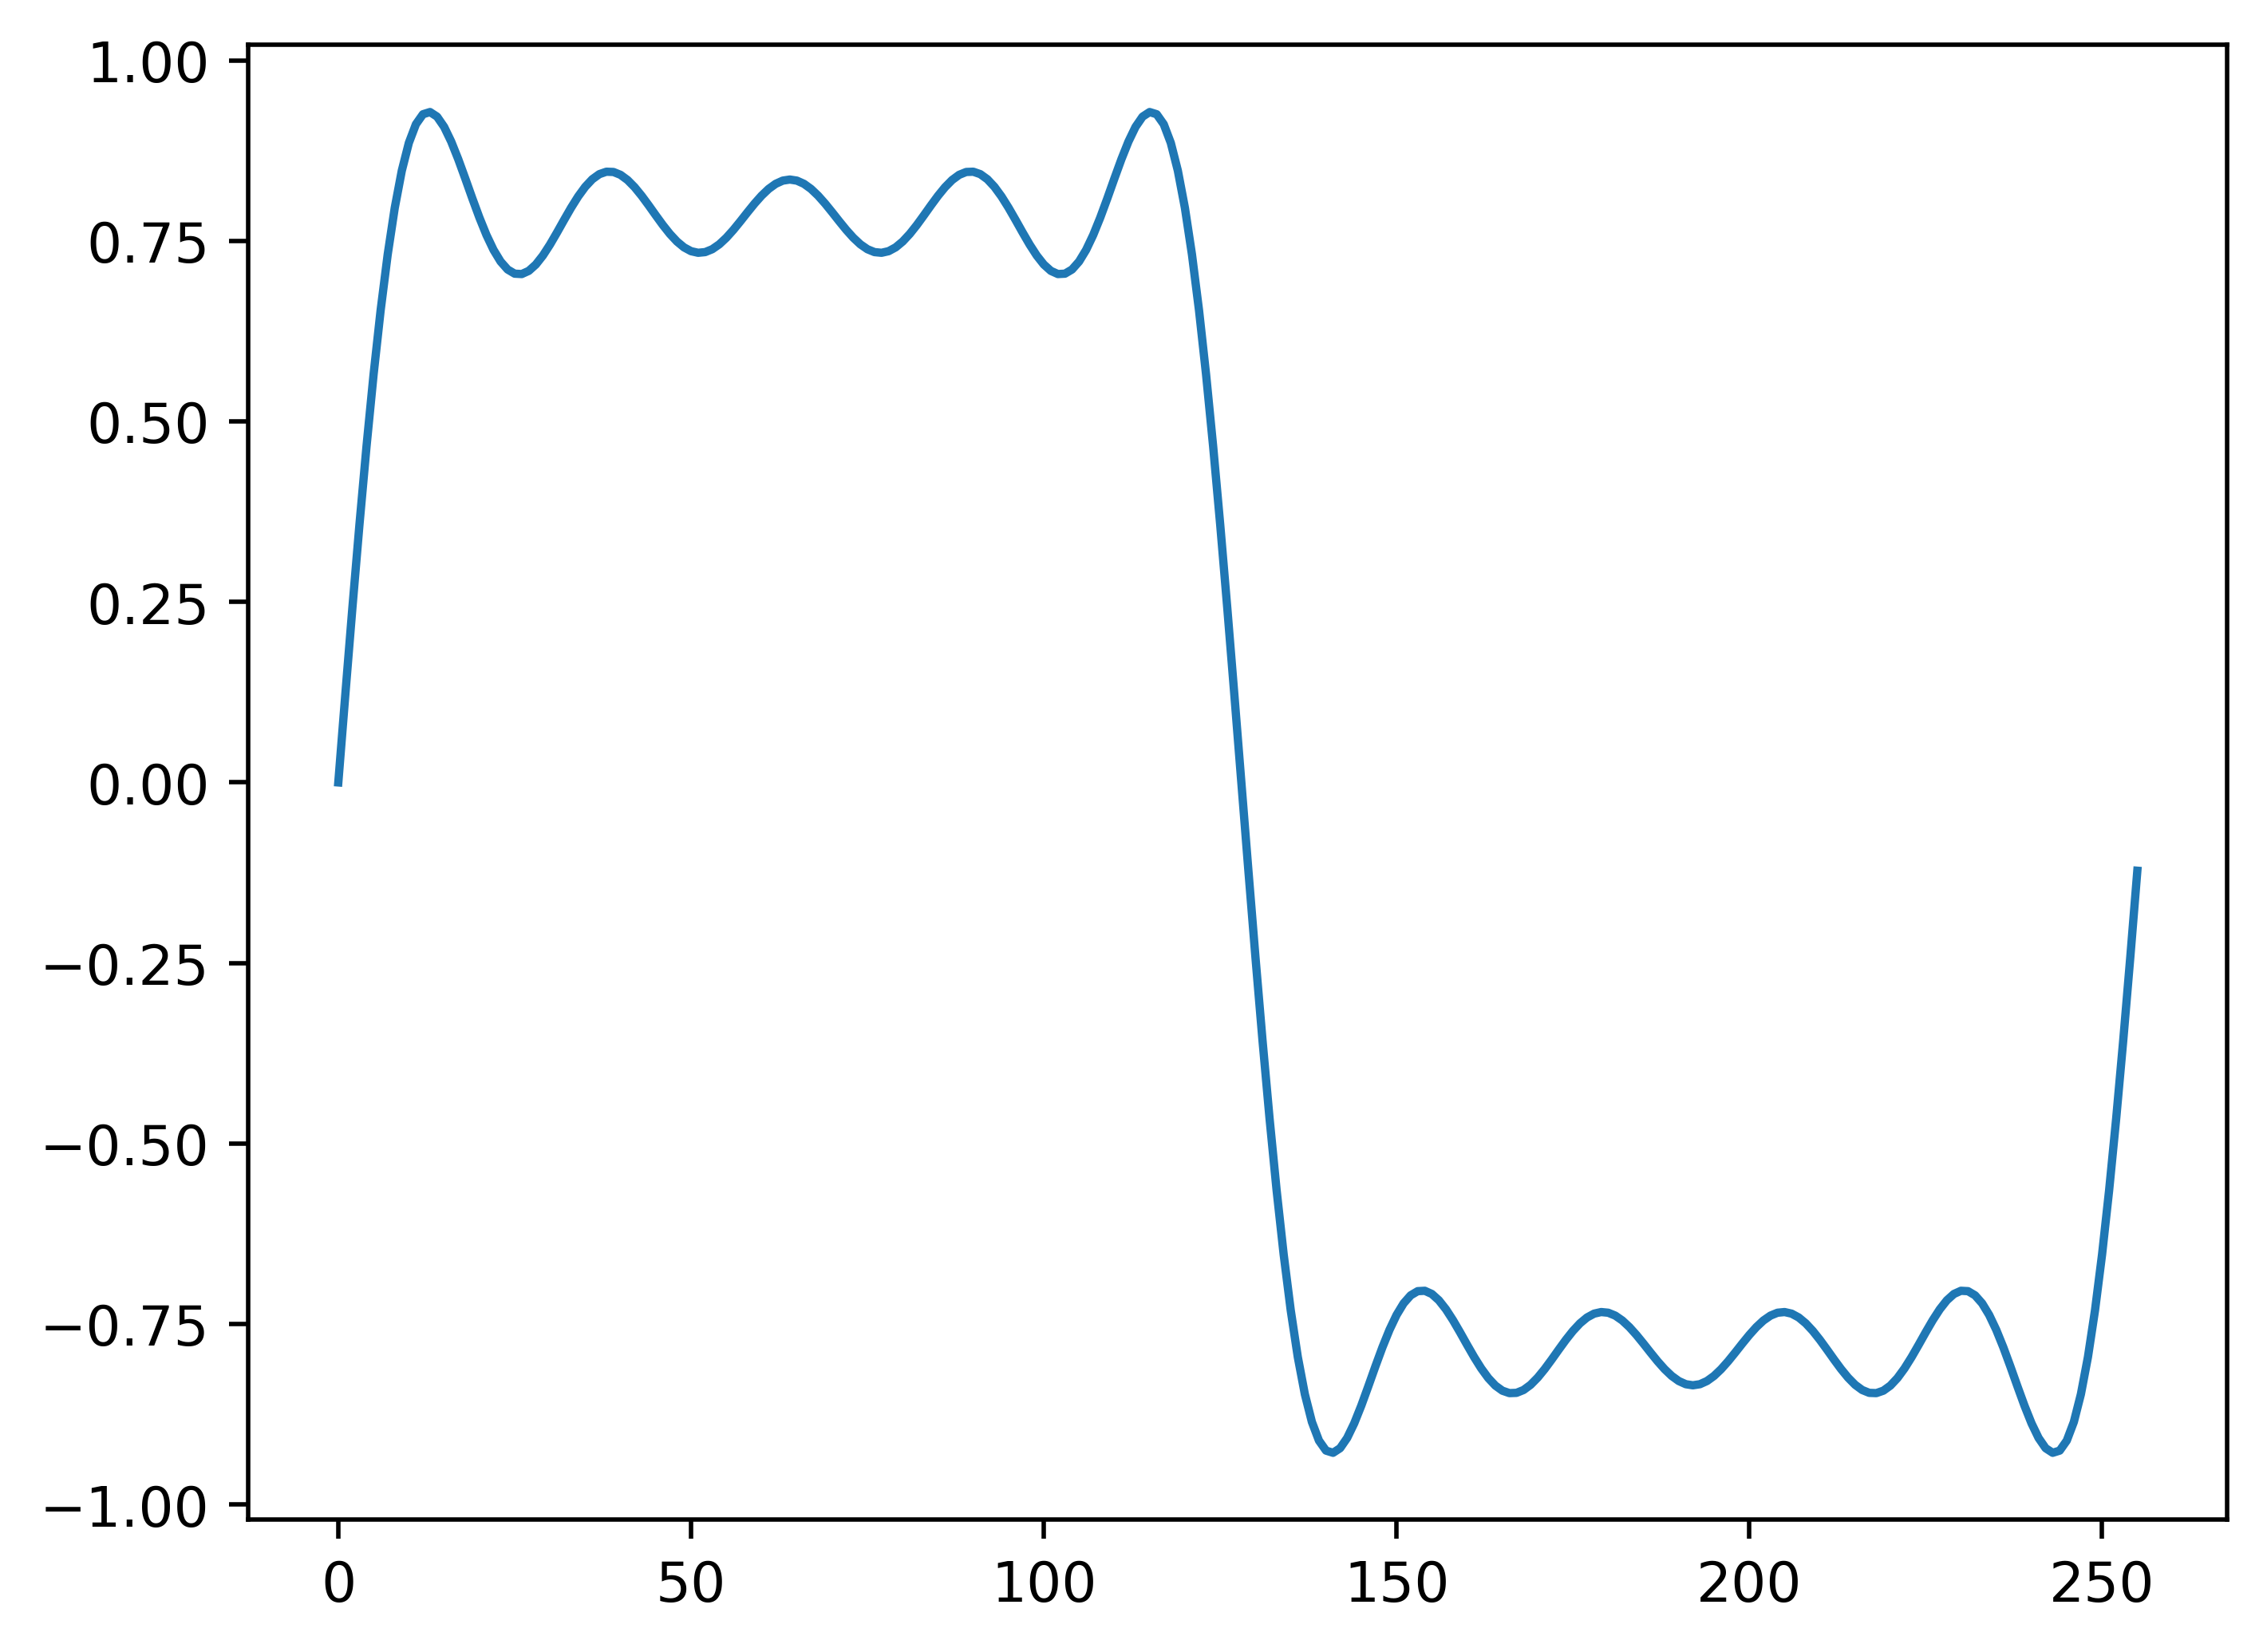

In [63]:
plt.plot(sum_s)
plt.show()

In [ ]:
'''Finally, calculate the FFT for the summed curve, and create a plot of amplitude vs.
frequency showing frequencies 1 through 20, with appropriate labels. Write a sentence or
two about the peaks that you see and if it matches your expectations.'''

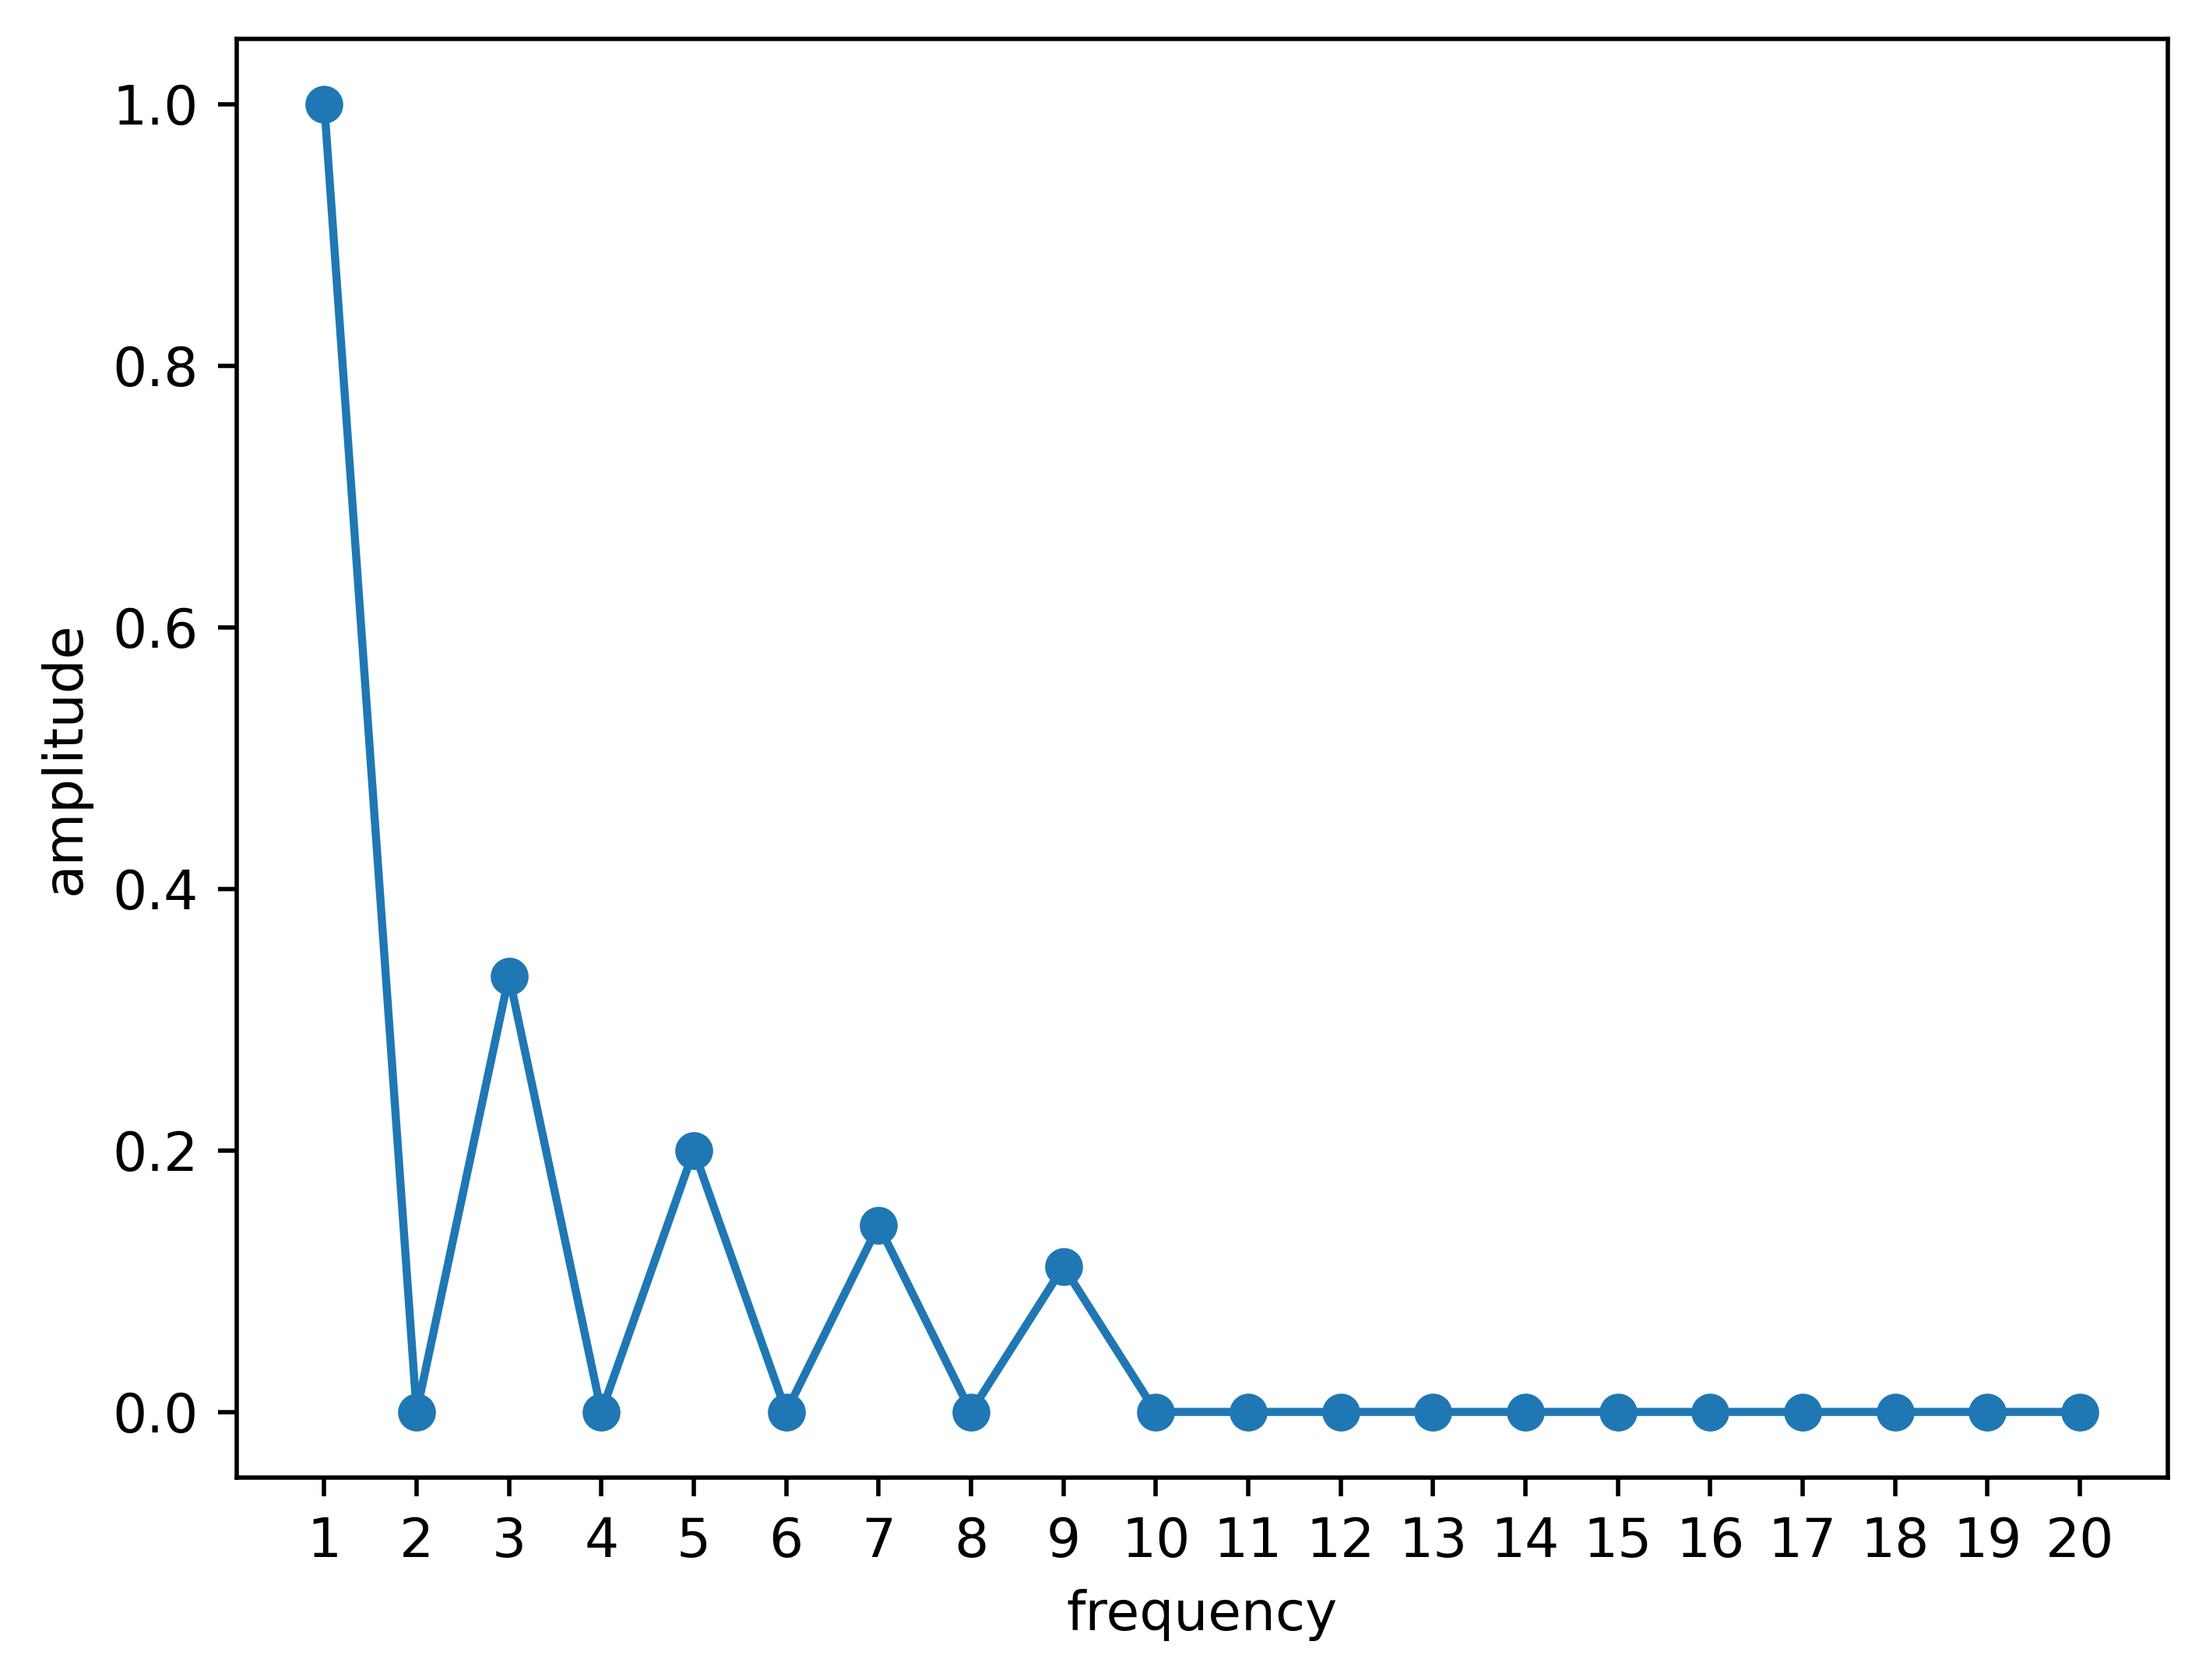

In [64]:
sum_fft = np.fft.fft(sum_s)/len(sum_s)*2
xticks = np.arange(1,21)
plt.plot(xticks, np.abs(sum_fft[1:21]),'o-')
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.xticks(xticks)
plt.show()

The peaks appear at frequencies 1, 3, 5, 7, and 9, which are the frequencies when we created the summed curve. The amplitudes of each of these peaks are expected. Since we set amplitude = 1/F, at 1F, the amplitude is 1, and at 3F, the amplitude is 1/3, etc.

## task4

In [ ]:
'''The inverse of the fast Fourier transform lets you transform the discrete Fourier values obtained
from a 1D vector, to reconstruct the original vector.
Use the function ifft and apply it to the FFT results from task 3 (your approximated square-wave
results). Create a new figure and plot the reconstructed signal.'''

/Users/Linda1/fsl/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/Linda1/fsl/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


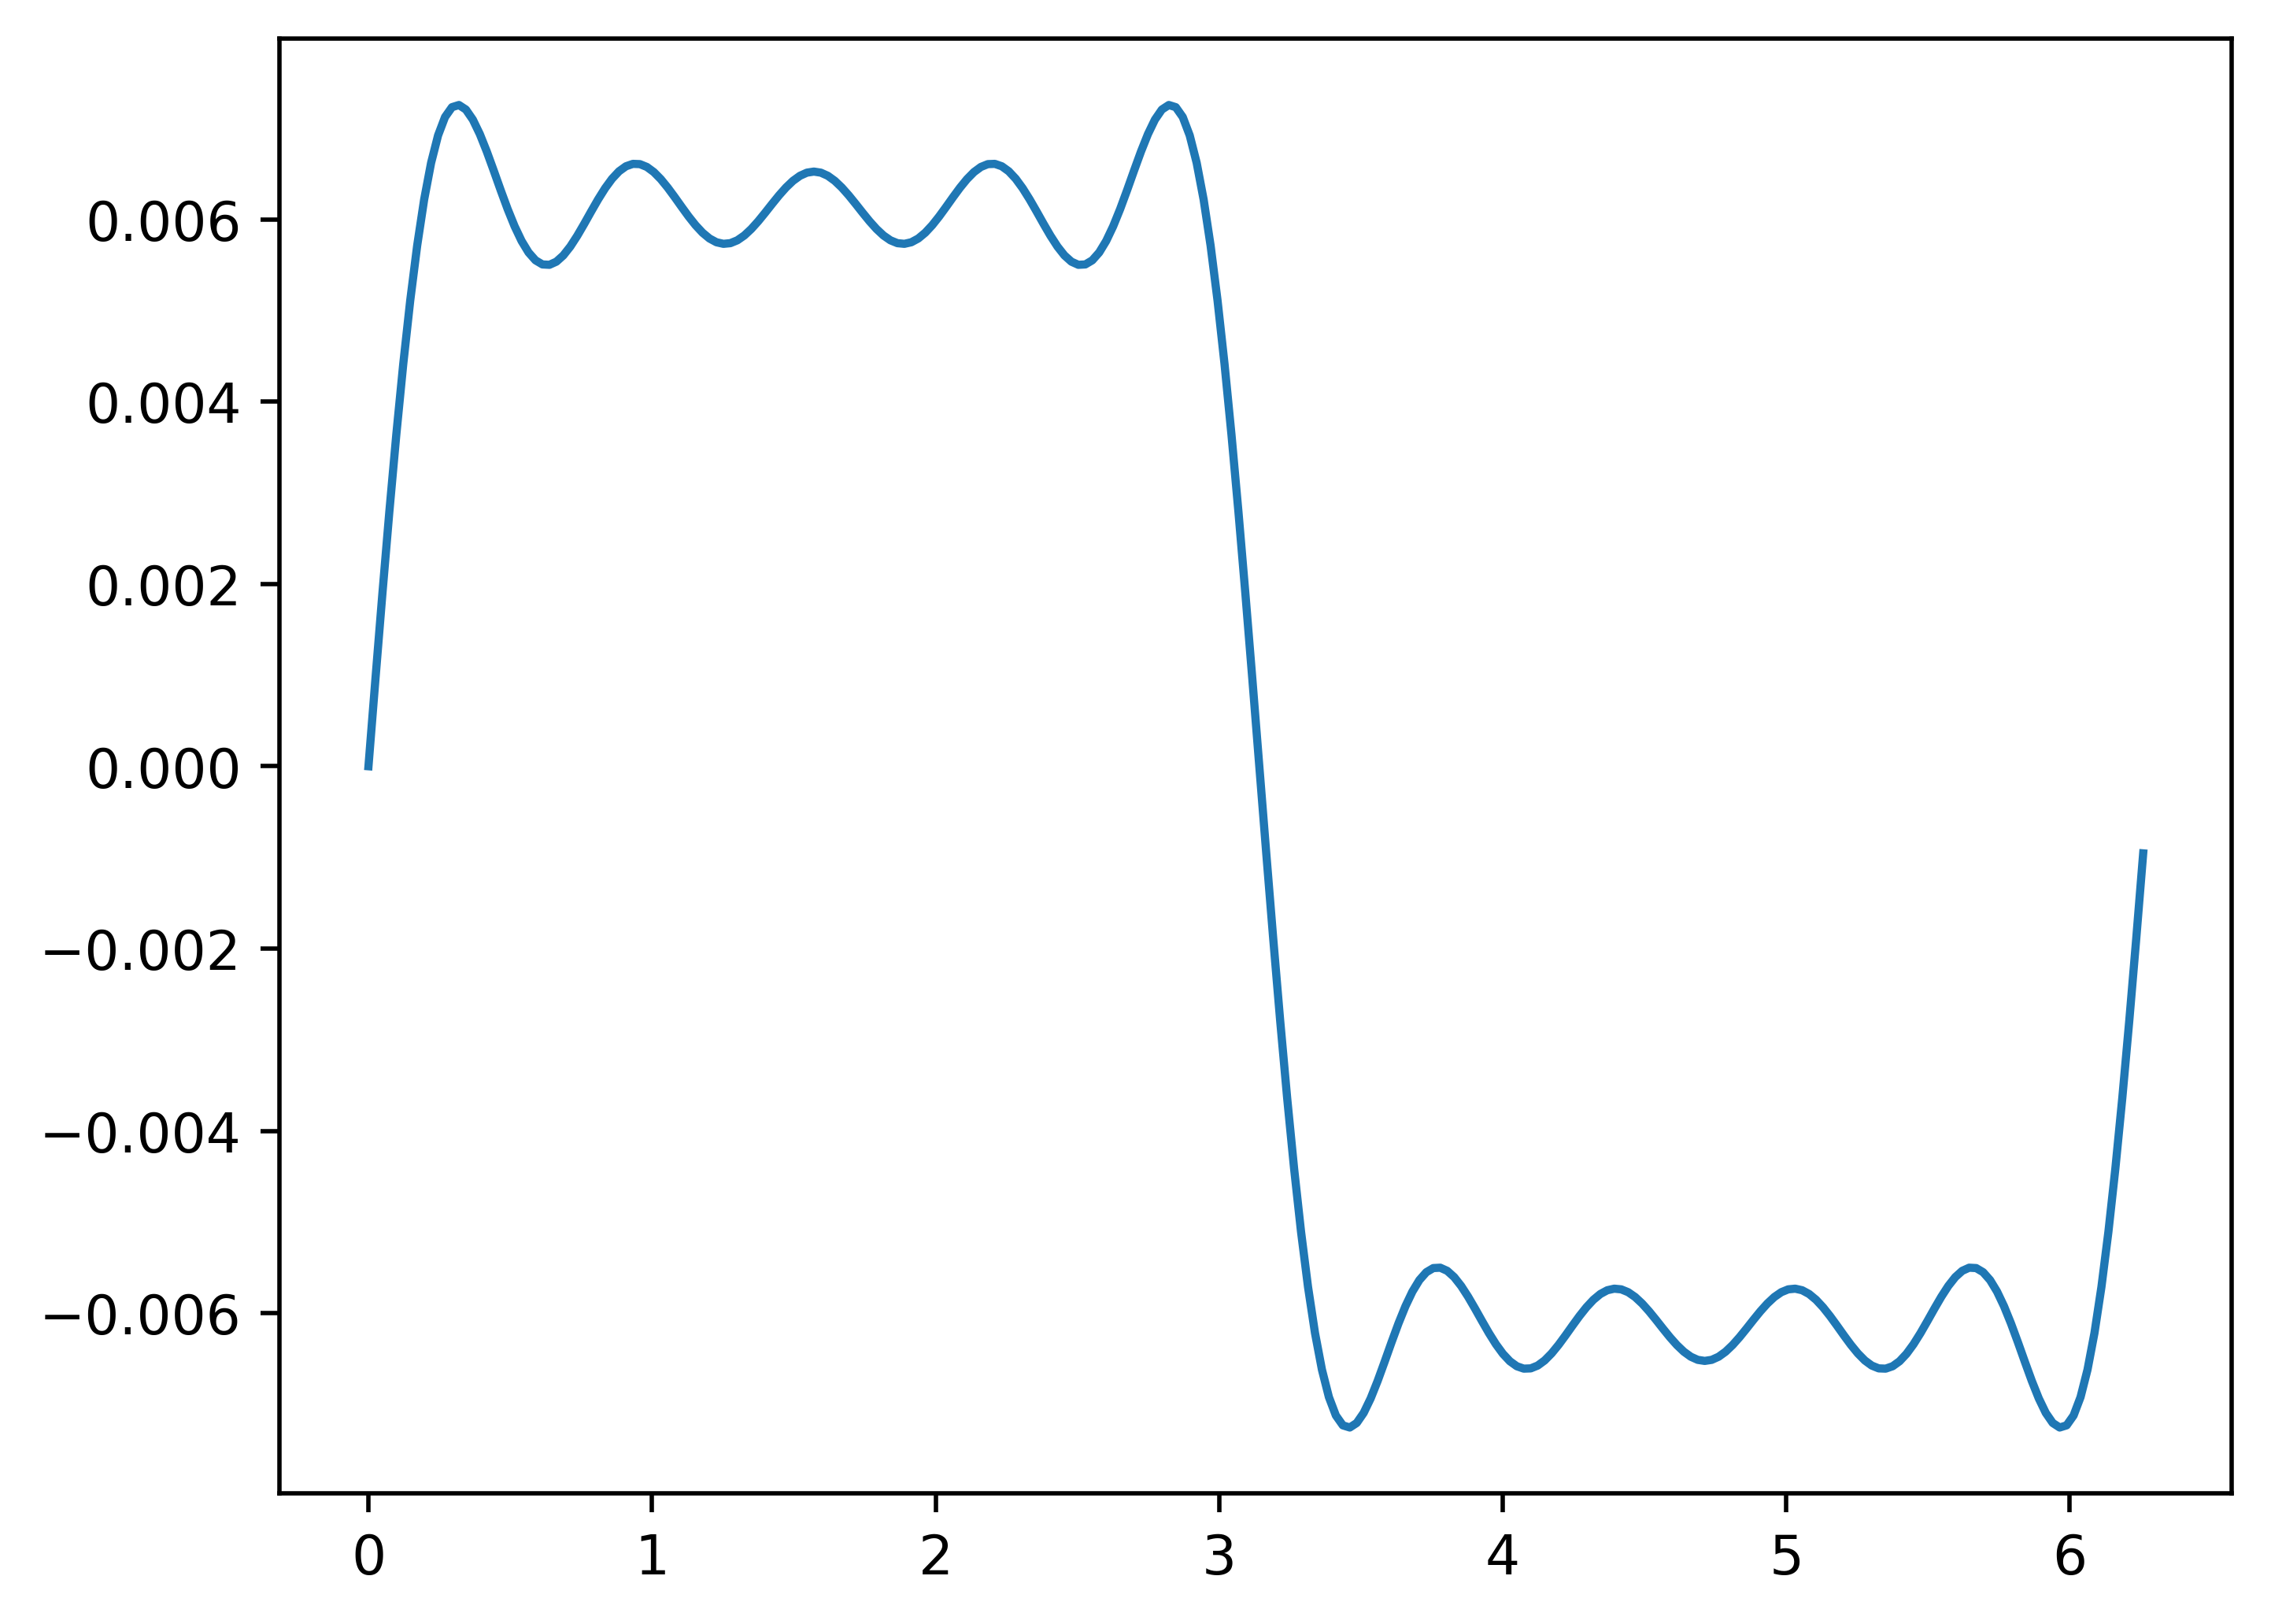

In [66]:
inv = np.fft.ifft(sum_fft)
plt.plot(x,inv)
plt.show()

It looks similar to the original signal but the range of y values is different. To make the reconstructed signal same as the original, we should apply fft without normalize it.

/Users/Linda1/fsl/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/Linda1/fsl/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


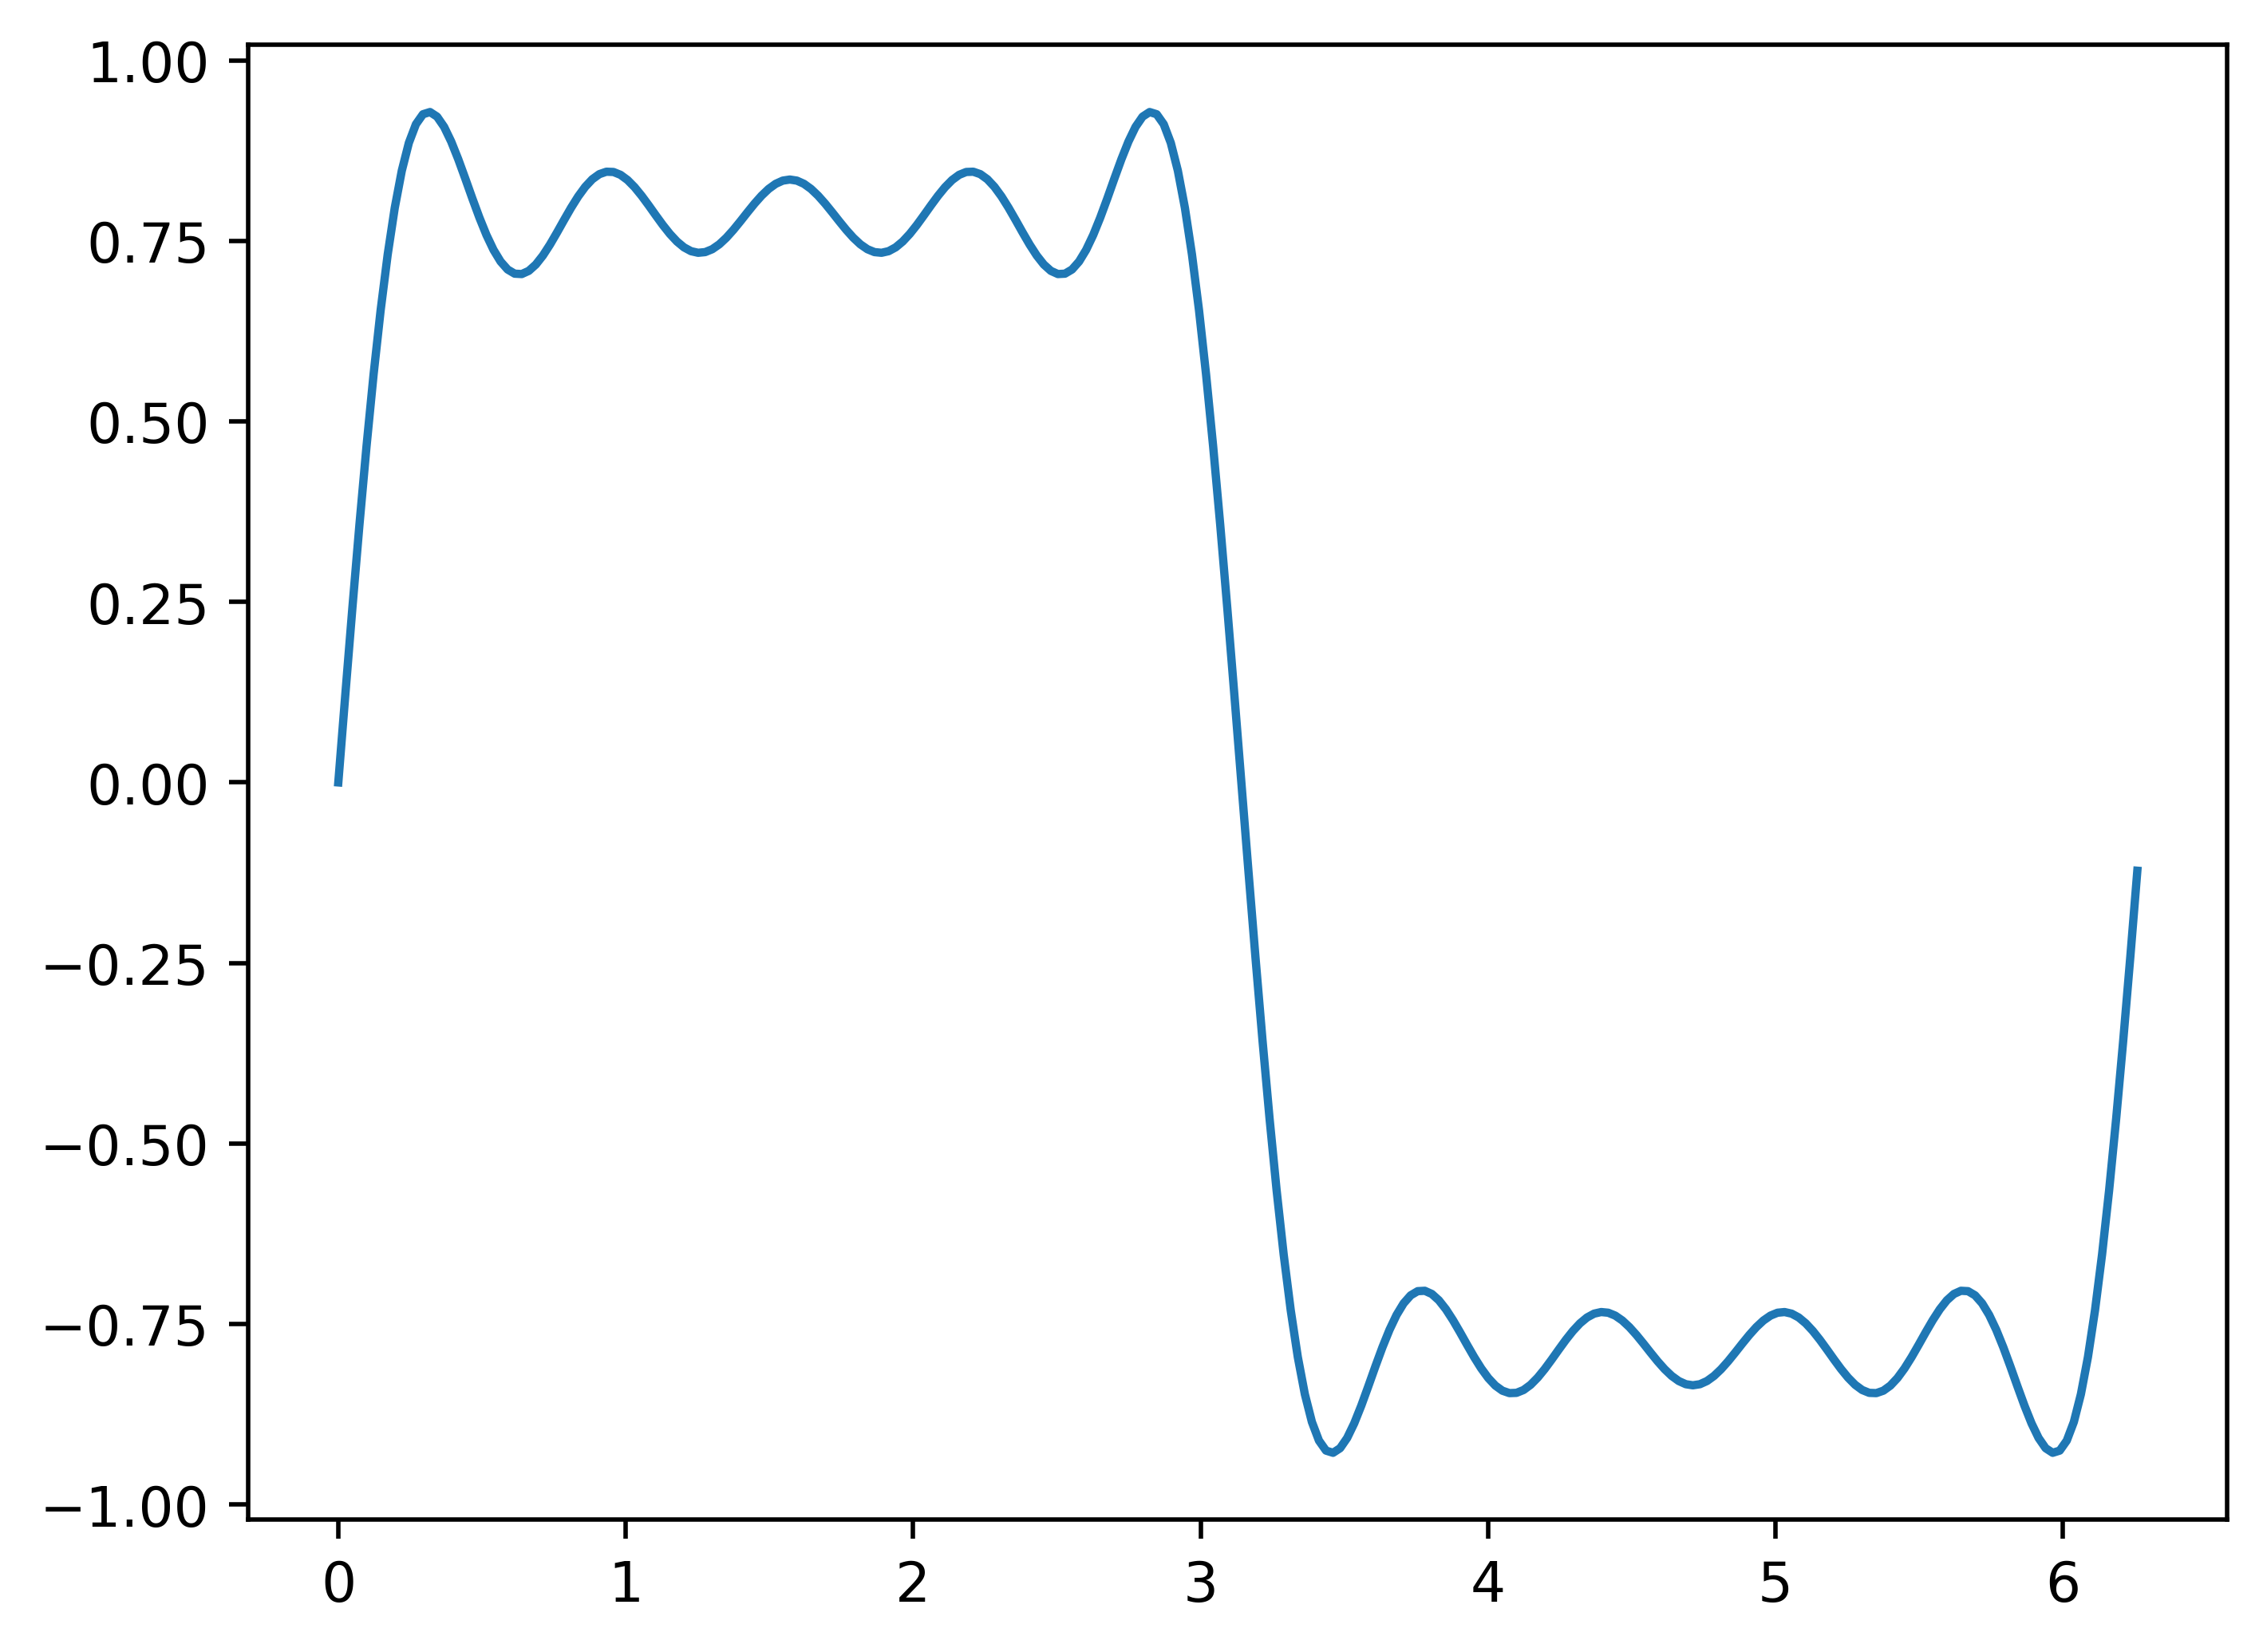

In [67]:
sum_fft_new = np.fft.fft(sum_s)
inv_new = np.fft.ifft(sum_fft_new)
plt.plot(x,inv_new)
plt.show()

In [ ]:
'''Now, let’s say we want to remove or filter out the fundamental frequency from the approximated
square-wave, and plot the new result of the filtered signal.
Go to the FFT results. You will need to set 2 values to zero, those that correspond to the
fundamental frequency. They will be the ones with the largest amplitude.'''

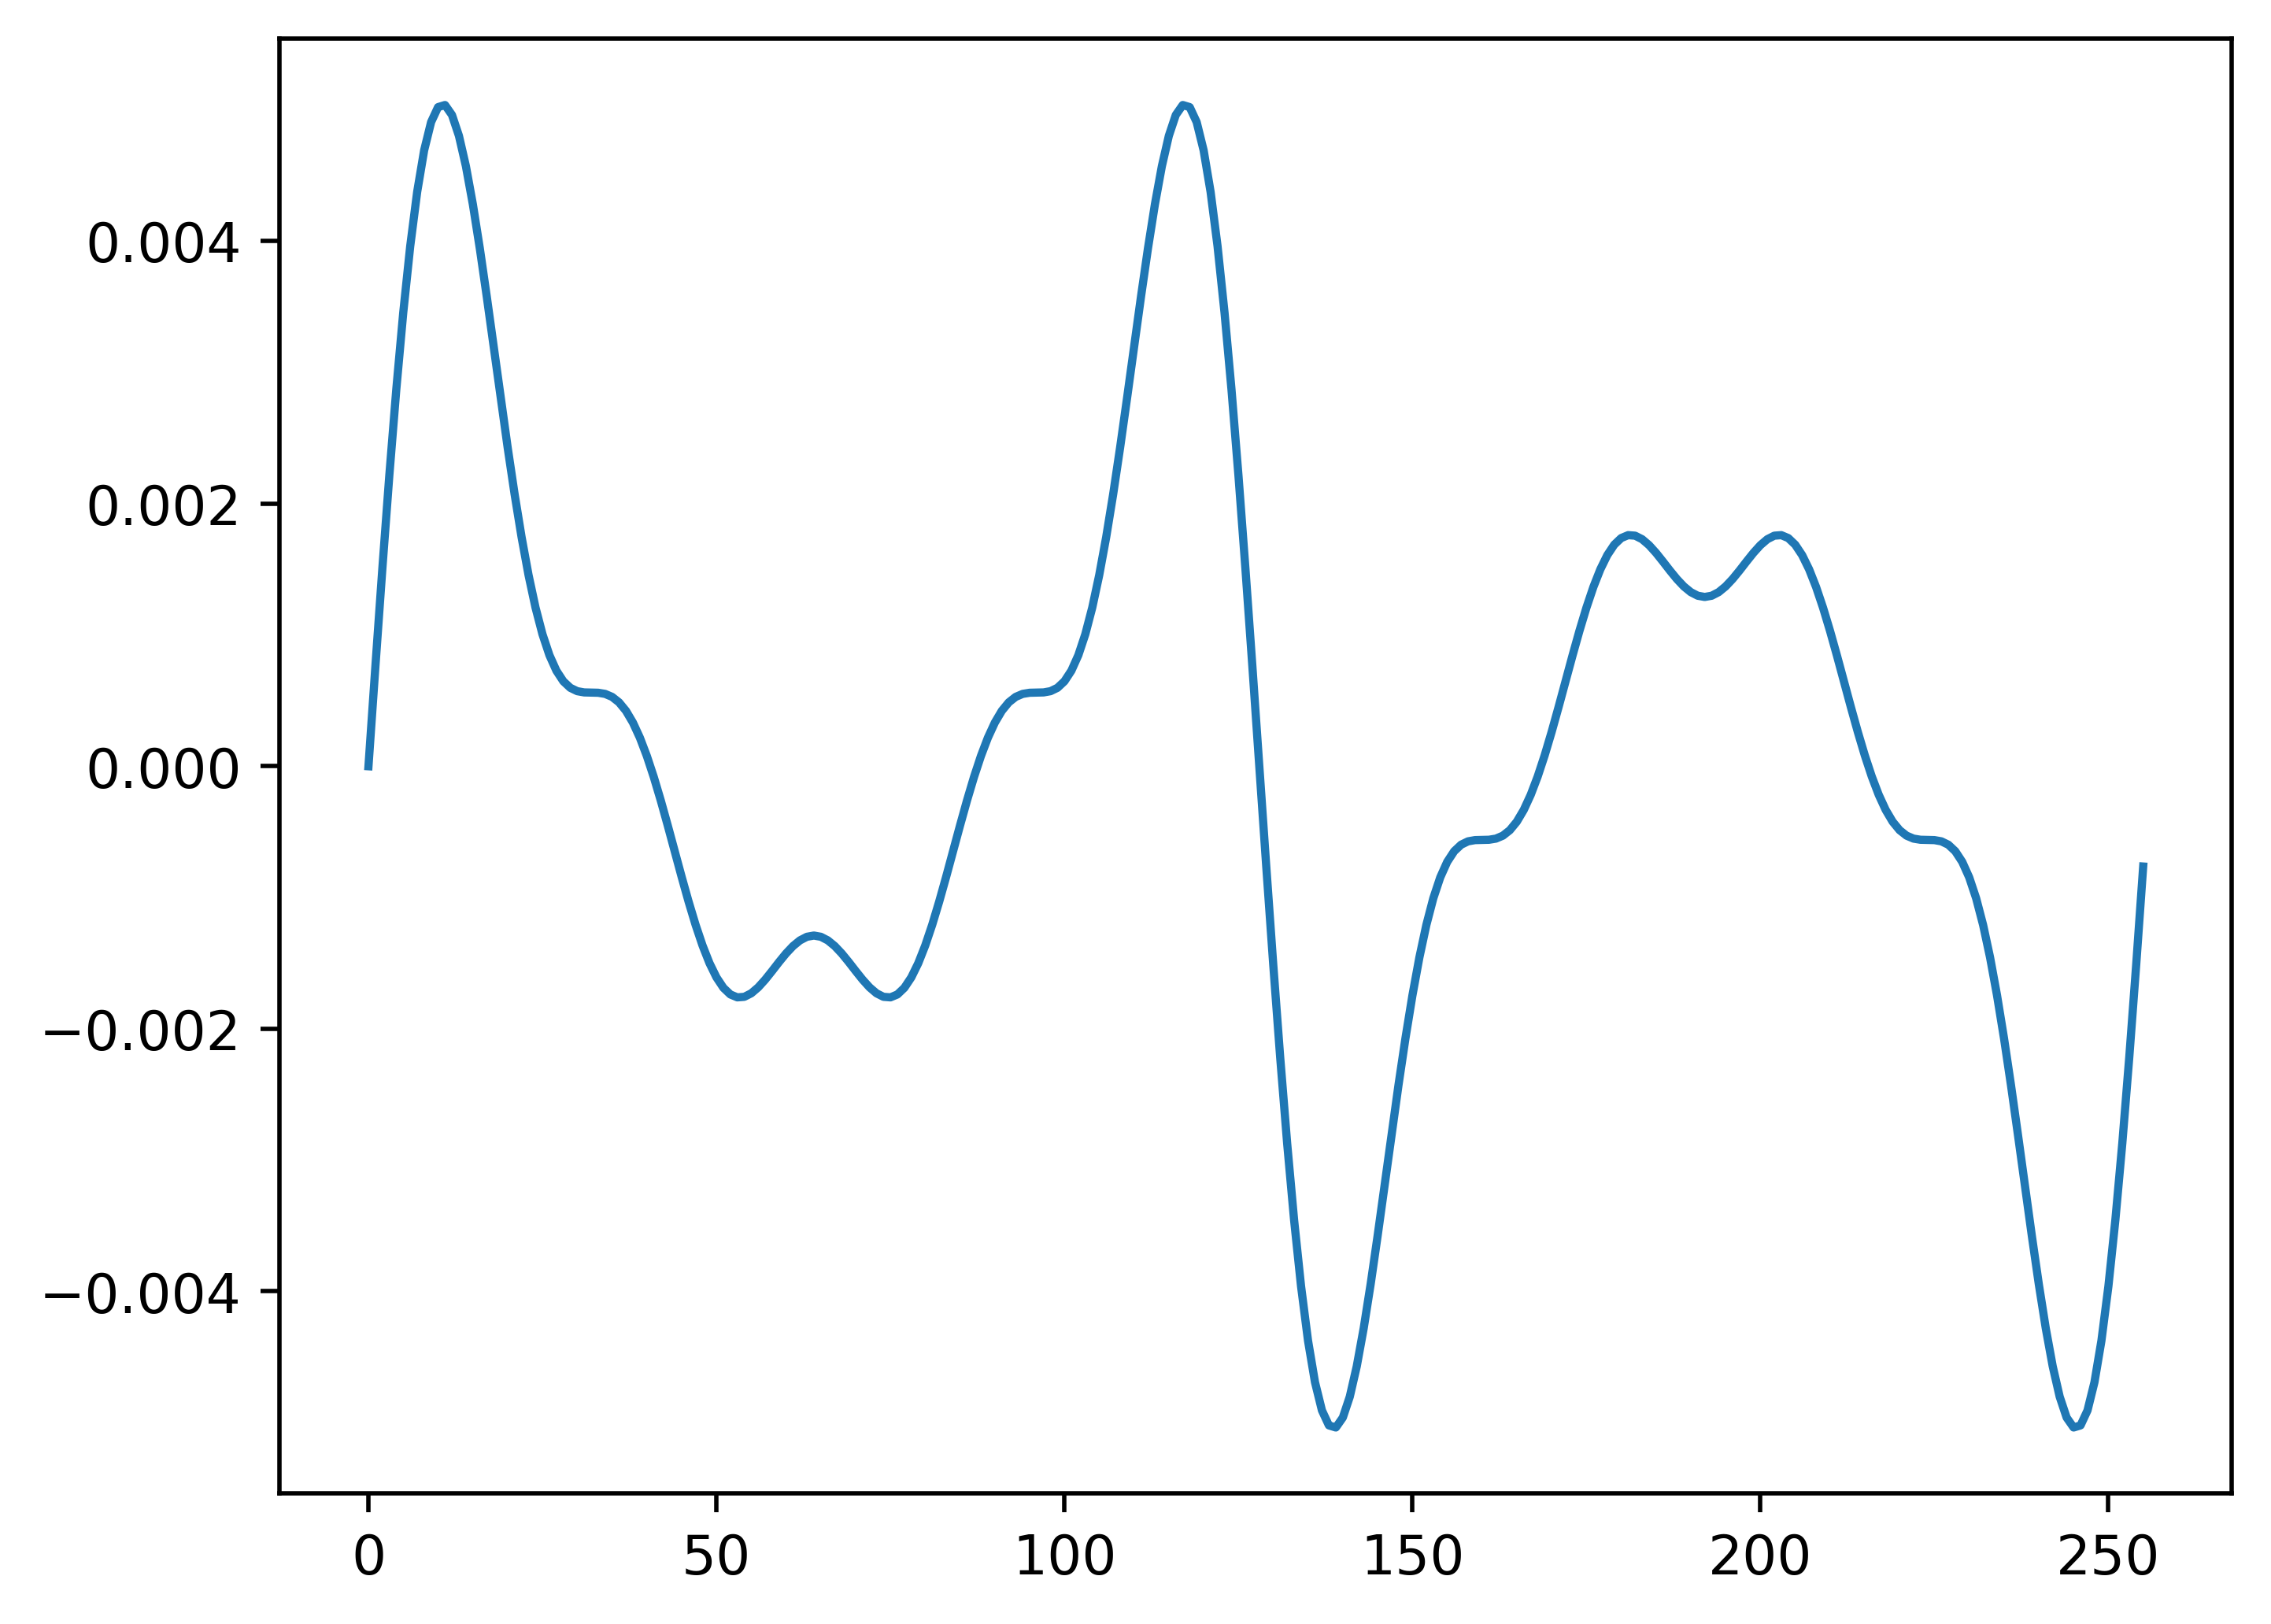

In [68]:
sum_fft[np.abs(sum_fft) == np.max(np.abs(sum_fft))] = 0
inv = np.fft.ifft(sum_fft)
plt.plot(inv)
plt.show()

In [ ]:
'''Now, reconstruct the modified FFT and add this filtered signal to your plot.
Write a sentence or two about how this signal looks.'''

The signal now looks less like a square wave.

## task5

In [69]:
x = np.linspace(0,2*np.pi,1000)
signal = np.sin(x*5)
noise = np.random.randn(1000,1)
y = signal*0.5+noise.T

In [ ]:
'''Create a figure with 4 x 2 subplots (original space, left; Fourier amplitude, right)
Plot signal and its FFT amplitude spectrum, using fftshift to show lowest frequencies in middle
Plot noise and its FFT amplitude spectrum, using fftshift to show lowest frequencies in middle
Plot y and its FFT amplitude spectrum, using fftshift to show lowest frequencies in middle
Place the figure in your assignment, and write a sentence or two describing the shape of
Fourier amplitude spectrum for the noise.'''

In [70]:
fft_signal = np.fft.fft(signal)/len(signal)*2
fft_noise = np.fft.fft(noise)/len(noise)*2
fft_y = np.fft.fft(y)/len(y)*2

In [72]:
z = np.fft.fft(y)
z2 = np.fft.fftshift(z)

n = 480
z2[0][1:2+n] = 0
z2[0][-(n + 1):] = 0
z3 = np.fft.ifftshift(z2) 

In [73]:
z4 = np.fft.ifft(z3)

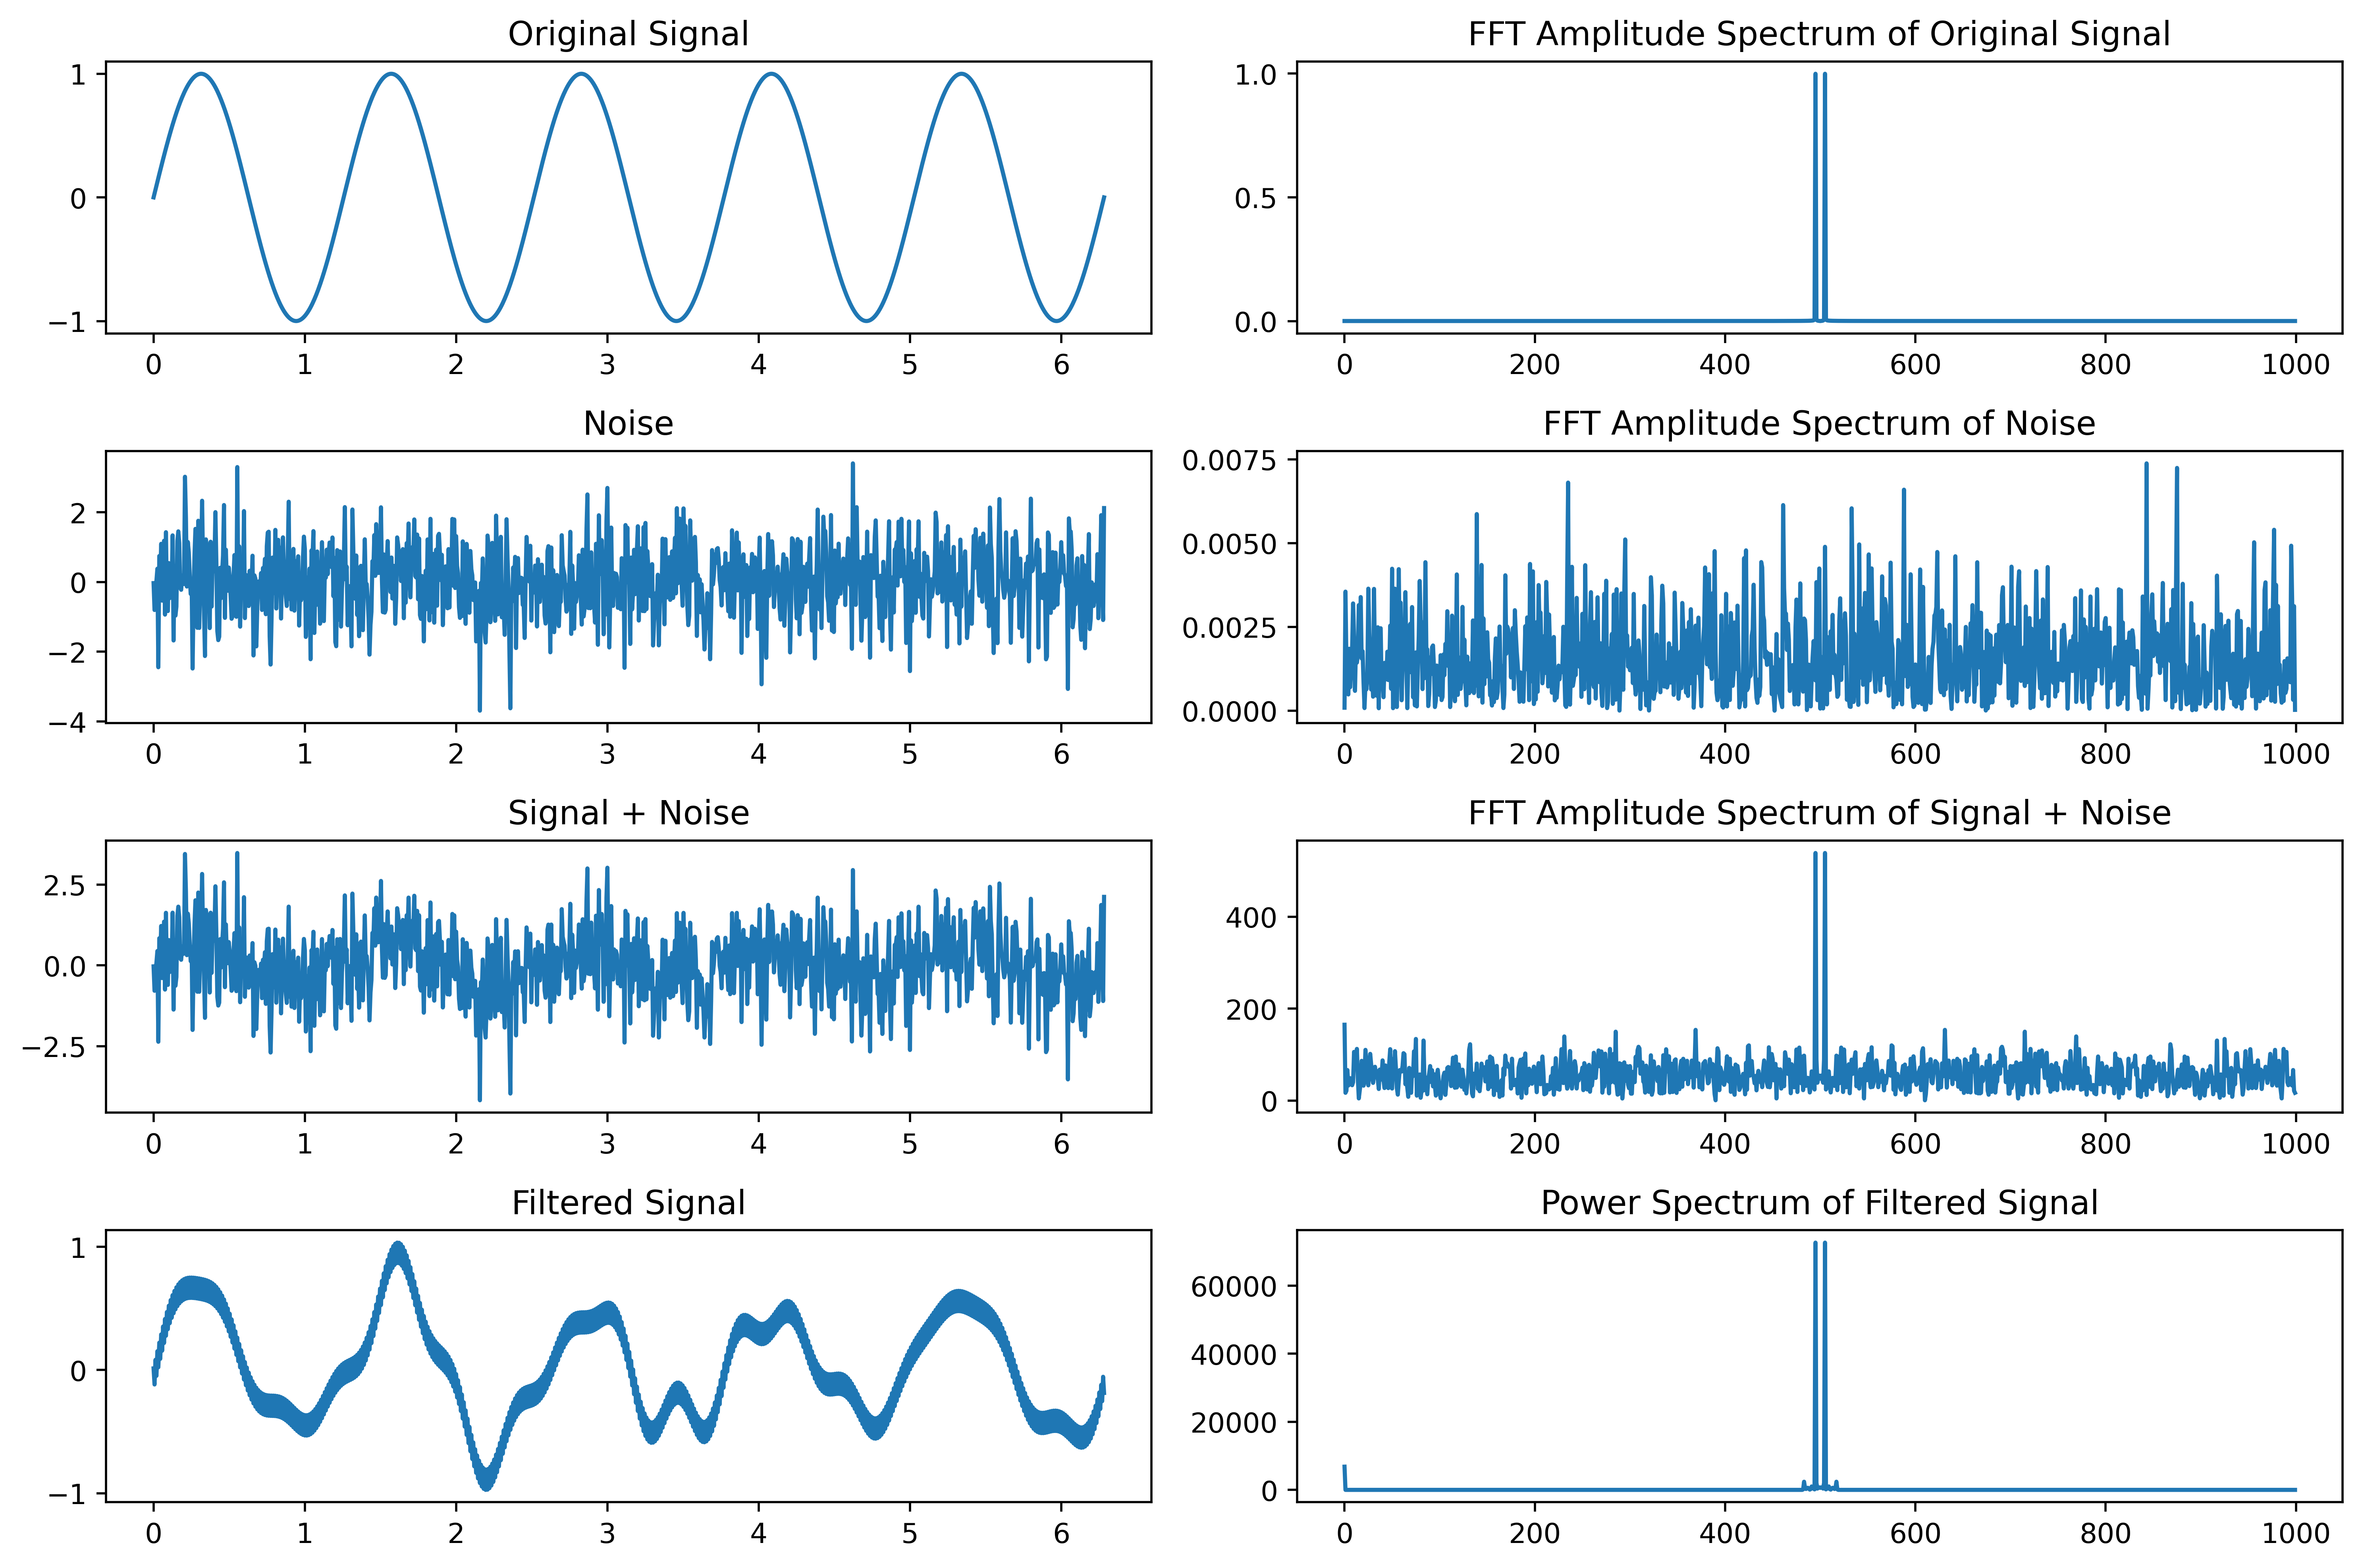

In [80]:
fig, axs = plt.subplots(4, 2, figsize=(12, 8))

axs[0, 0].plot(x, signal)
axs[0, 0].set_title("Original Signal")
axs[0, 1].plot(abs(np.fft.fftshift(fft_signal)))
axs[0, 1].set_title("FFT Amplitude Spectrum of Original Signal")

axs[1, 0].plot(x, noise)
axs[1, 0].set_title("Noise")
axs[1, 1].plot(abs(np.fft.fftshift(fft_noise)))
axs[1, 1].set_title("FFT Amplitude Spectrum of Noise")

axs[2, 0].plot(x, y.T)
axs[2, 0].set_title("Signal + Noise")
axs[2, 1].plot(abs(np.fft.fftshift(fft_y)).T)
axs[2, 1].set_title("FFT Amplitude Spectrum of Signal + Noise")

axs[3, 0].plot(x, z4.T)
axs[3, 0].set_title("Filtered Signal")
# power spectrum
axs[3, 1].plot((abs(z2).T)**2)
axs[3, 1].set_title("Power Spectrum of Filtered Signal")

plt.tight_layout()
plt.show()


The shape of Fourier amplitude spectrum for noise is similar to the noise in its original space. In the plot of Fourier amplitude spectrum of signal plus noise, we can see a distinction between signal and noise.

We did fftshift to move lower frequencies into middle, and make higher frequencies located at two ends to be 0. This type of filtering is called a low-pass filter.